# **Bank Customer Churn Prediction**

The dataset includes the following attributes:

    Customer ID: A unique identifier for each customer
    Surname: The customer's surname or last name
    Credit Score: A numerical value representing the customer's credit score
    Geography: The country where the customer resides (France, Spain or Germany)
    Gender: The customer's gender (Male or Female)
    Age: The customer's age.
    Tenure: The number of years the customer has been with the bank
    Balance: The customer's account balance
    NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
    HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
    IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
    EstimatedSalary: The estimated salary of the customer
    Exited: Whether the customer has churned (1 = yes, 0 = no)

## **1. Importing libraries**

In [ ]:
!pip install xgboost catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')


##**2. Dataset Loading**

In [ ]:
train = pd.read_csv('train.csv')

print(train.shape)
train.head()

(165034, 14)


id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

##**2. Dataset Exploration**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
train.describe(include="number")

id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000

In [ ]:
train.describe(include="object")

Surname Geography  Gender
count   165034    165034  165034
unique    2797         3       2
top       Hsia    France    Male
freq      2456     94215   93150

In [ ]:
# Checking duplicates
train.duplicated().sum()

np.int64(0)

No duplicates exist in data set

In [ ]:
# Checking null values
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
train['HasCrCard'].value_counts()

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

In [ ]:
train['IsActiveMember'].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

In [ ]:
# Dropping columns CustomerId, Surname, id: since they are irrelevant for the analysis

train = train.drop(columns=['CustomerId', 'Surname', 'id'], errors='ignore')

##**3. Exploratory Data Analysis**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [ ]:
train[['Geography', 'Gender']].nunique()

Geography    3
Gender       2
dtype: int64

In [ ]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=['float64','int64']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

Categorical columns: ['Geography', 'Gender']
Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
# Since some columns are binary in nature, hence we will treat them as categorical
binary_cols = ['HasCrCard', 'IsActiveMember']

In [ ]:
# Remove certain columns from numerical columns
numerical_cols = [col for col in numerical_cols if col not in binary_cols]
numerical_cols.remove('Exited')

### **Univariate Analysis**

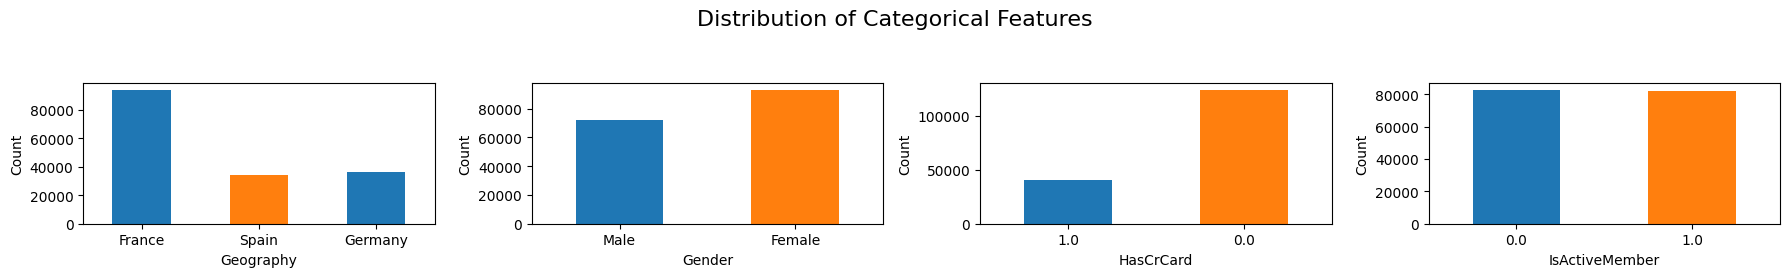

In [ ]:
all_cols = categorical_cols + binary_cols

# Set up the plot grid
n_cols = 4
n_rows = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()
colors = ['#1f77b4', '#ff7f0e']  # Blue for 0, Orange for 1
# Plot distribution for each binary column
for i, col in enumerate(all_cols):
    train[col].value_counts(dropna=False).sort_index().plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_xticks(range(len(train[col].value_counts(dropna=False).index)))
    axes[i].set_xticklabels([str(x) for x in train[col].value_counts(dropna=False).index], rotation=0)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

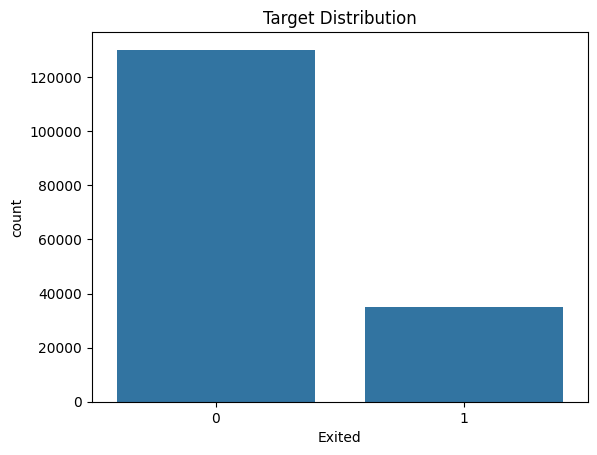

In [ ]:
sns.countplot(data=train, x='Exited')
plt.title("Target Distribution")
plt.show()

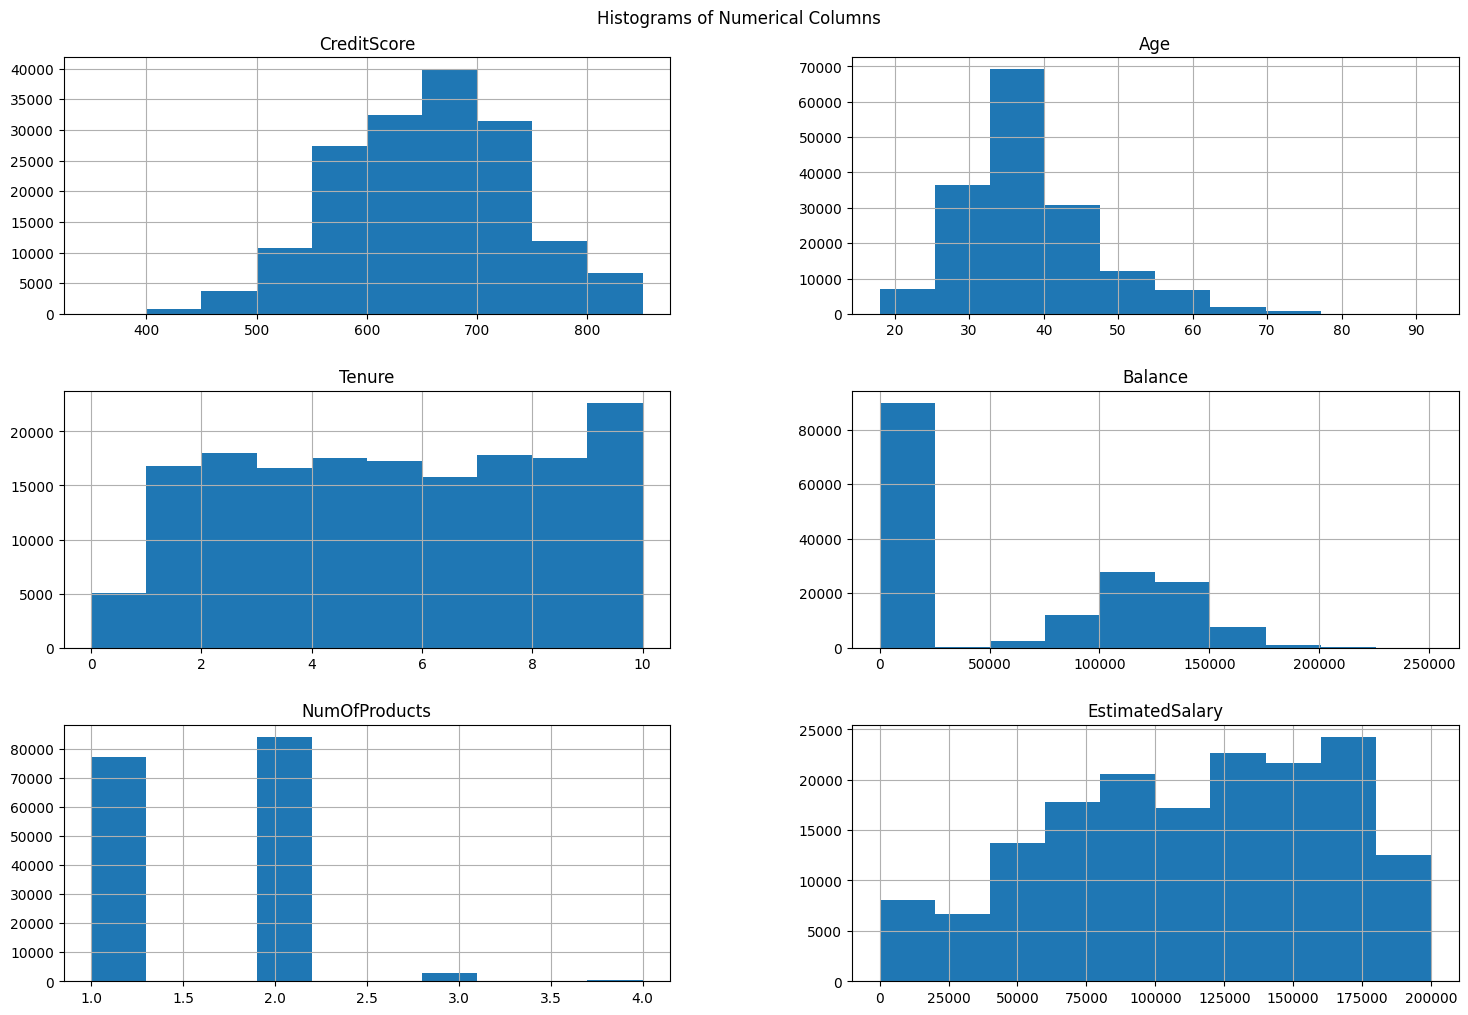

In [ ]:
# Plot histograms for numerical columns
train[numerical_cols].hist(figsize=(18, 12))
plt.suptitle('Histograms of Numerical Columns', y=0.92)
plt.show()

### **Bivariate Analysis**

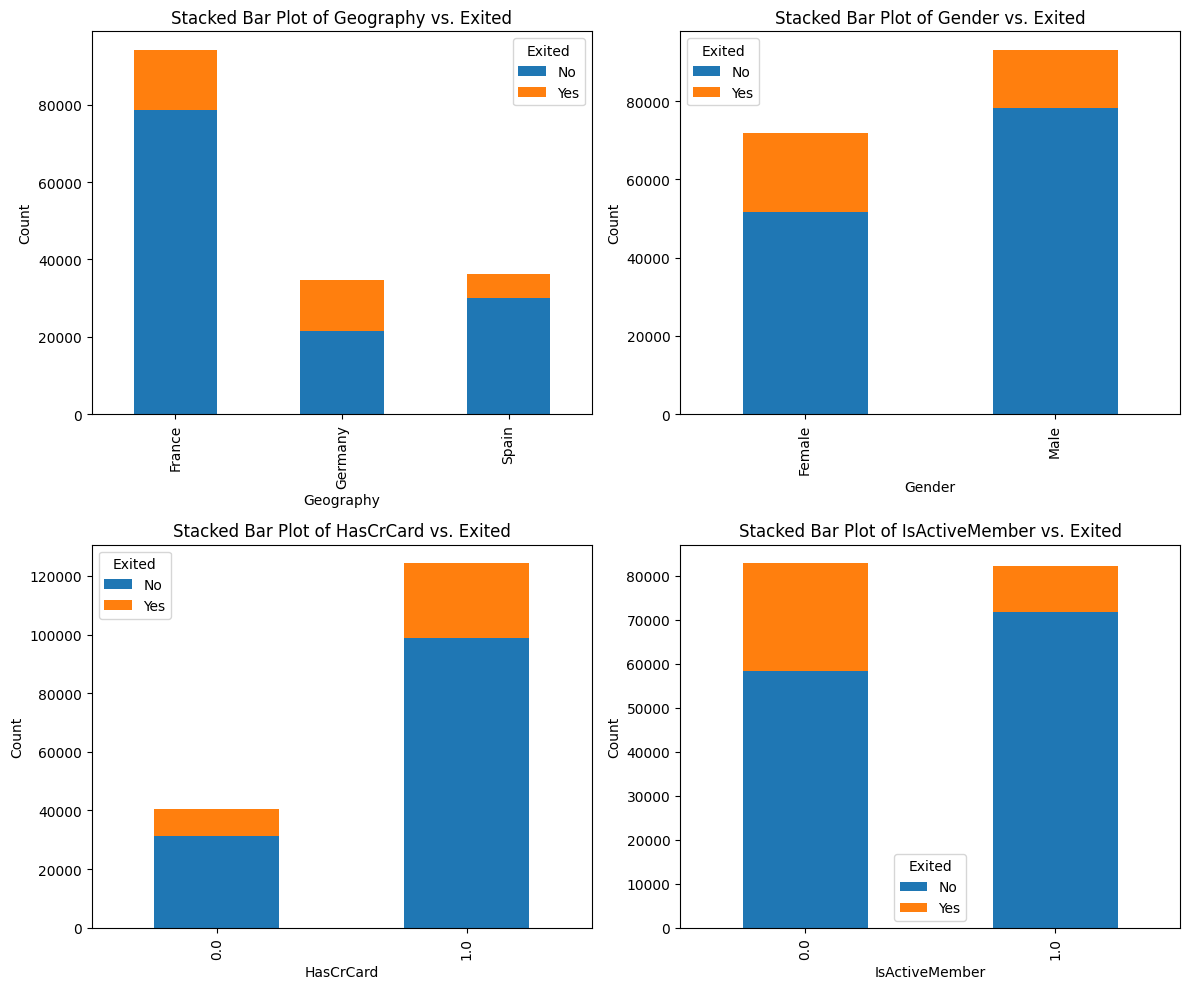

In [ ]:
plots_per_row = 2
num_cols = len(all_cols)
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 6, num_rows * 5))
axes = axes.flatten()

for idx, col in enumerate(all_cols):
    cross_tab = pd.crosstab(train[col], train['Exited'])
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_title(f'Stacked Bar Plot of {col} vs. Exited')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Exited', labels=['No', 'Yes'])

for i in range(len(all_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


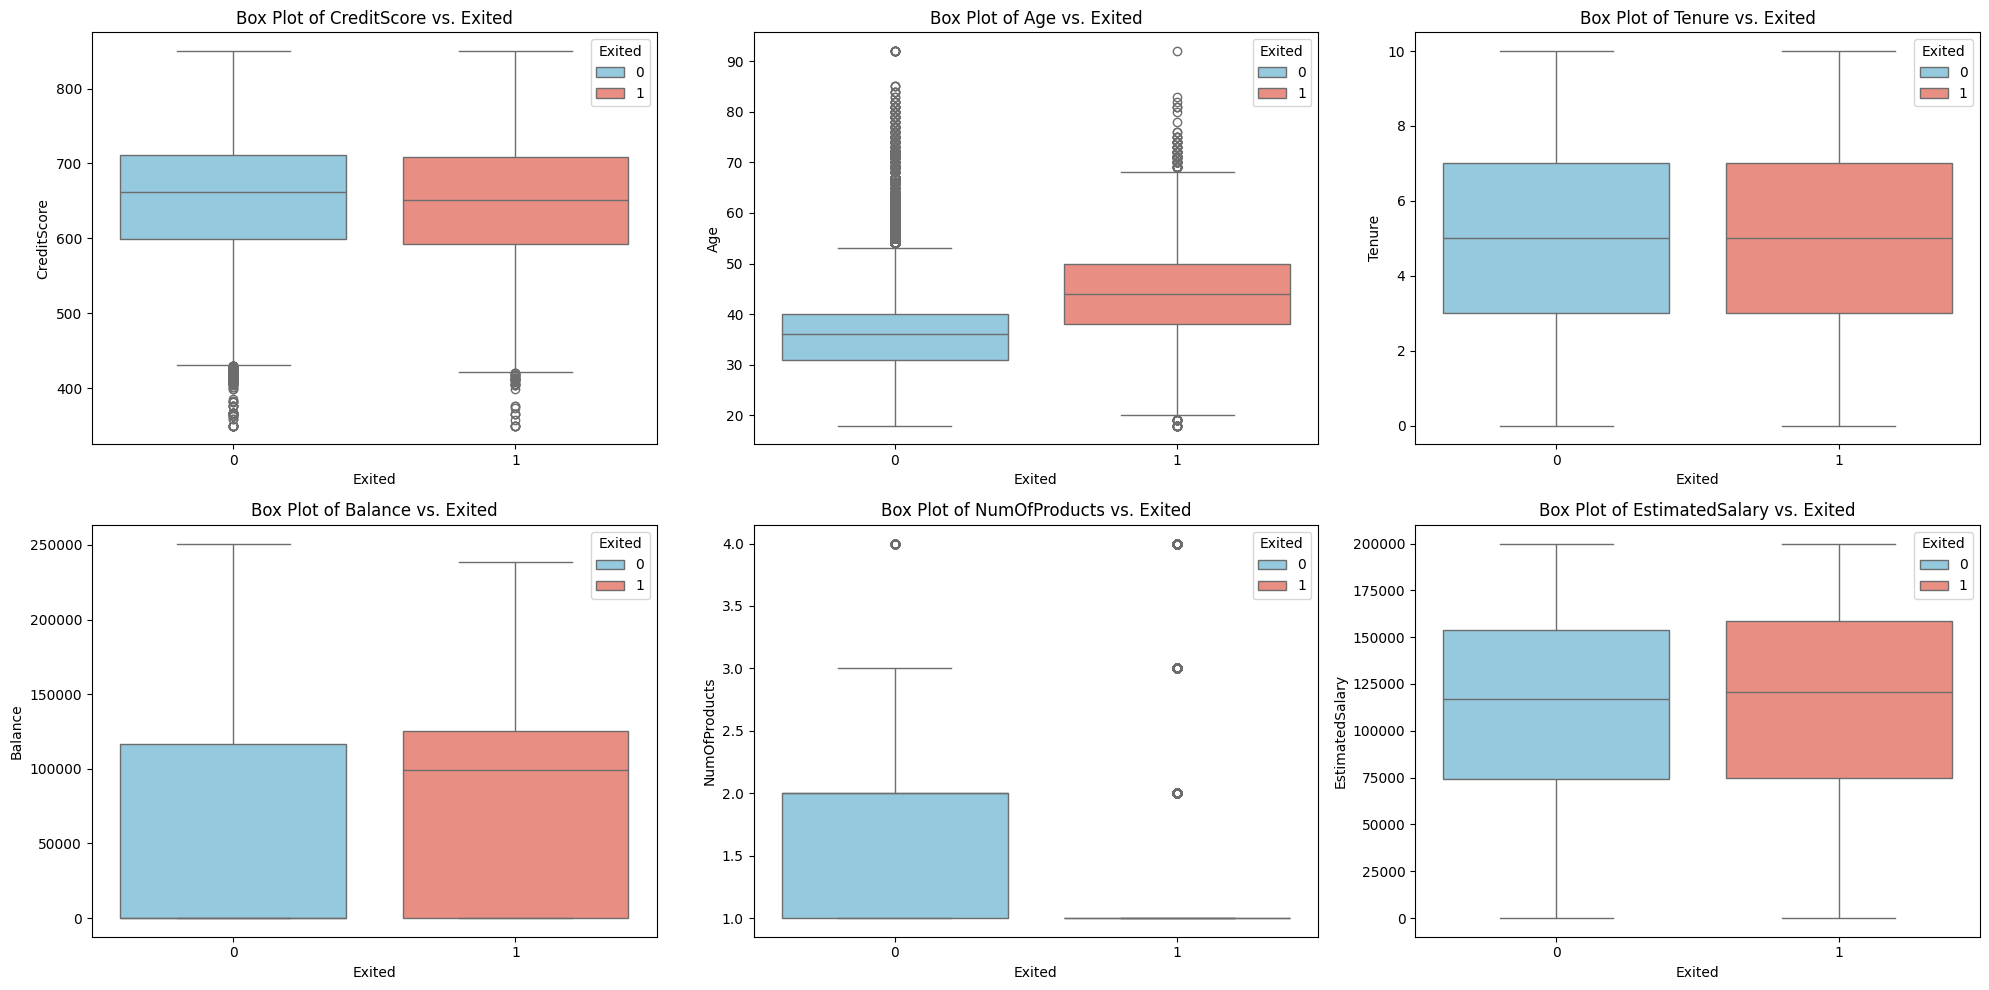

In [ ]:
# Box plots for numerical columns vs. Exited
import math

num_cols = len(numerical_cols)
cols =3
rows = math.ceil(num_cols / cols)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 5))

for i, col in enumerate(numerical_cols):
    row_index = i // cols
    col_index = i % cols
    ax = axes[row_index, col_index]

    sns.boxplot(x='Exited', y=col, data=train,ax=ax, hue='Exited', palette={0: 'skyblue', 1: 'salmon'})
    ax.set_title(f'Box Plot of {col} vs. Exited')
    ax.set_xlabel('Exited')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### **Correlation Analysis**

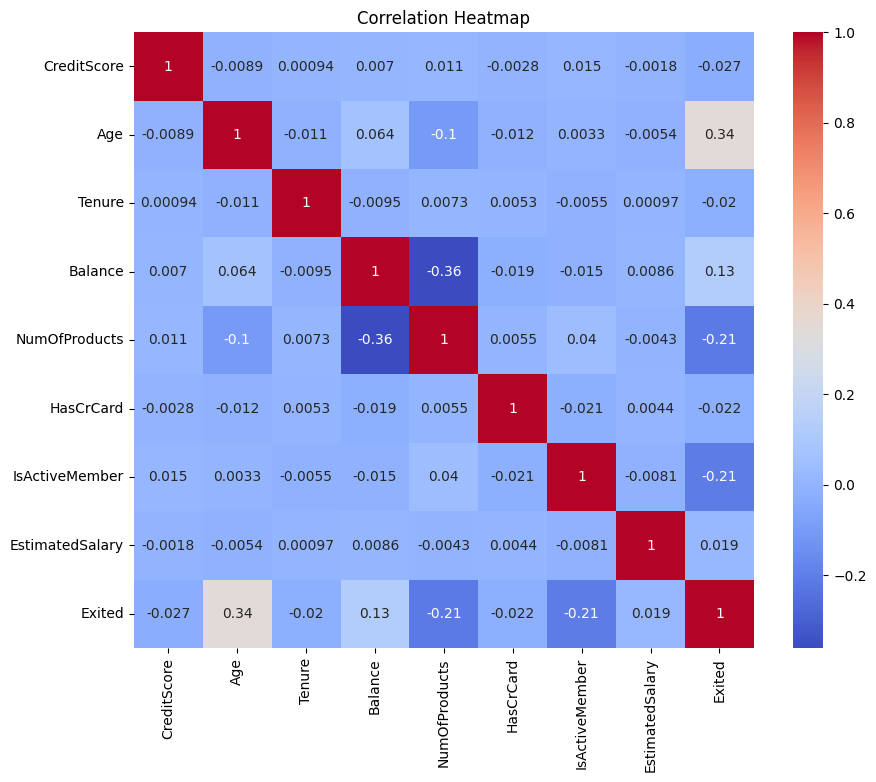

In [ ]:
numerical_cols = train.select_dtypes(include=['float64','int64']).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### **Feature Engineering for better data exploration**

In [ ]:
df_transform = train.copy()

In [ ]:
df_transform['AgeGroup'] = pd.cut(df_transform['Age'], bins=[0, 25, 35, 45, 60, 100], labels=['<25','25-35','35-45','45-60','60+'])
df_transform['CreditTier'] = pd.cut(df_transform['CreditScore'], bins=[300, 580, 670, 740, 800, 850], labels=['Poor','Fair','Good','Very Good','Excellent'])

In [ ]:
df_transform.head()

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited AgeGroup CreditTier  
0        1.0             0.0        181449.97       0    25-35       Fair  
1        1.0             1.0         49503.50       0    25-35       Fair  
2        1.0             0.0        184866.69       0    35-45       Good  
3        1.0             1.0         84560.88       0    25-35       Fair  
4        1.0             1.0         15068.83       0    25-35       Good

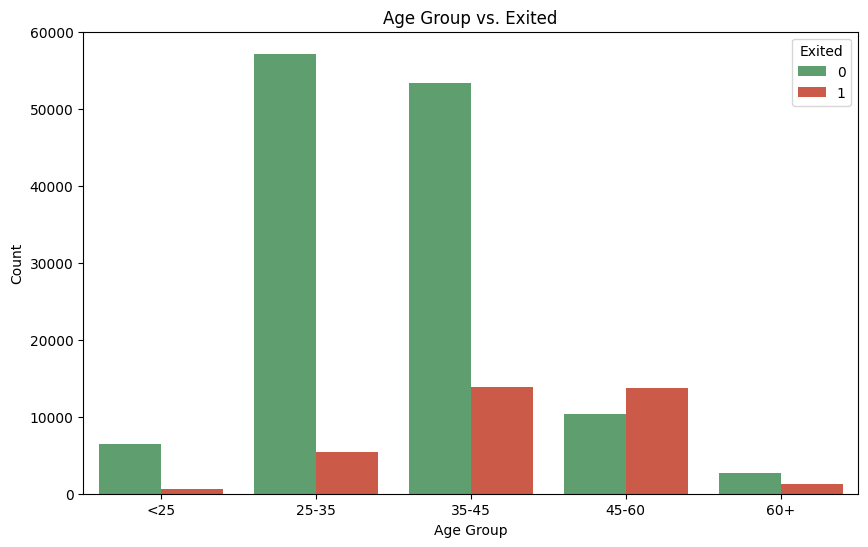

In [ ]:
# Plot Age Group with Extited
palette = {0: "#55A868", 1: "#E24A33"}
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=df_transform, palette=palette)
plt.title('Age Group vs. Exited')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

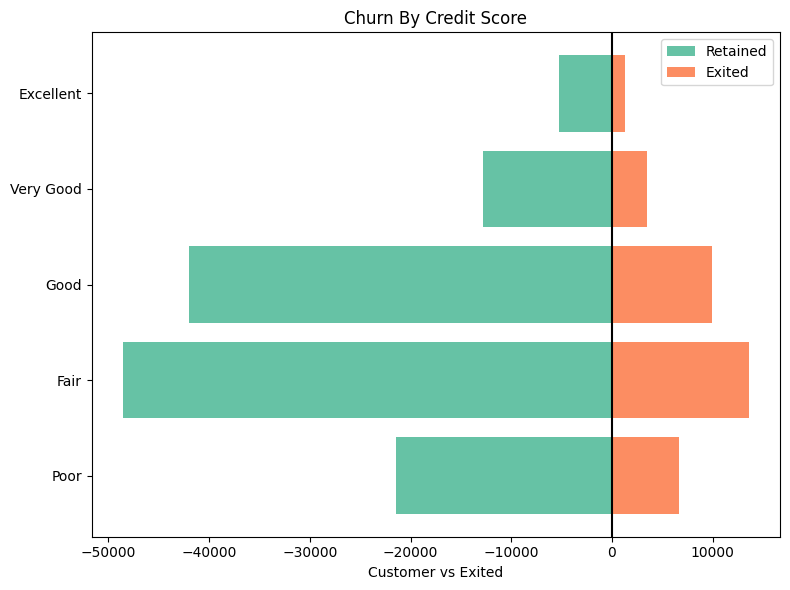

In [ ]:
# Group by CreditTier and count total customers and exited
grouped = df_transform.groupby('CreditTier')['Exited'].agg(['count', 'sum']).reset_index()
grouped.columns = ['CreditTier', 'Total', 'Exited']
grouped['Retained'] = grouped['Total'] - grouped['Exited']

credit_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
grouped['CreditTier'] = pd.Categorical(grouped['CreditTier'], categories=credit_order, ordered=True)
grouped = grouped.sort_values('CreditTier')

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(grouped['CreditTier'], -grouped['Retained'], color='#66C2A5', label='Retained')
plt.barh(grouped['CreditTier'], grouped['Exited'], color='#FC8D62', label='Exited')
plt.axvline(0, color='black')

plt.xlabel('Customer vs Exited')
plt.title('Churn By Credit Score')
plt.legend(loc='upper right')
plt.tight_layout()

In [ ]:
df_transform.drop(columns=['AgeGroup', 'CreditTier'], inplace=True)

In [ ]:
# Encode categorical variables
cat_features = ['Geography', 'Gender']
df_encoded = pd.get_dummies(df_transform, columns=cat_features, drop_first=True)

In [ ]:
correlation_with_target = df_encoded.corr(numeric_only=True)['Exited'].sort_values(ascending=False)
correlation_with_target

Exited               1.000000
Age                  0.340768
Geography_Germany    0.211054
Balance              0.129743
EstimatedSalary      0.018827
Tenure              -0.019565
HasCrCard           -0.022141
CreditScore         -0.027383
Geography_Spain     -0.051175
Gender_Male         -0.146442
IsActiveMember      -0.210237
NumOfProducts       -0.214554
Name: Exited, dtype: float64

In [ ]:
corr_df = pd.DataFrame(correlation_with_target.index, columns=['Feature'])
corr_df['Correlation'] = correlation_with_target.values
corr_df.drop(corr_df[corr_df['Feature'] == 'Exited'].index, inplace=True)

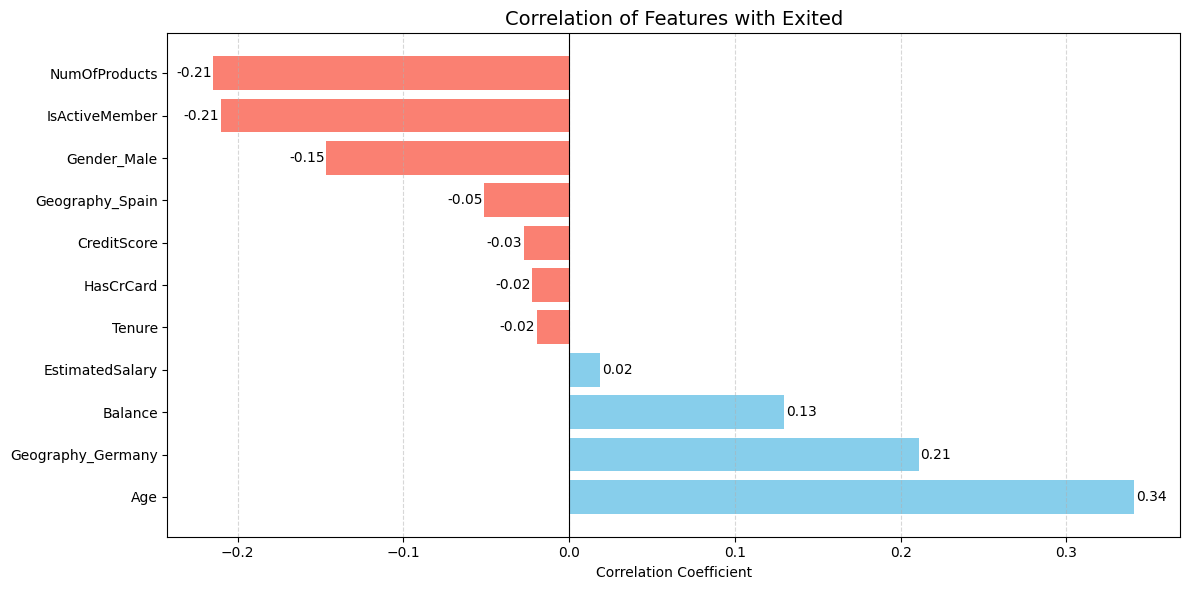

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.barh(corr_df['Feature'], corr_df['Correlation'], color=['salmon' if val < 0 else 'skyblue' for val in corr_df['Correlation']])
plt.axvline(x=0, color='black', linewidth=0.8)
plt.title('Correlation of Features with Exited', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate values
for bar in bars:
    plt.text(bar.get_width() + 0.001 if bar.get_width() > 0 else bar.get_width() - 0.001,
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}",
             va='center', ha='left' if bar.get_width() > 0 else 'right')

plt.tight_layout()
plt.show()

## **4. Data Preparation and Partitioning**

#### **Encoding Categorical Values**

In [ ]:
# Encode categorical variables
cat_features = ['Geography', 'Gender']
train_encoded = pd.get_dummies(train, columns=cat_features, drop_first=True)

In [ ]:
train_encoded.head()

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668  33.0       3       0.00              2        1.0   
1          627  33.0       1       0.00              2        1.0   
2          678  40.0      10       0.00              2        1.0   
3          581  34.0       2  148882.54              1        1.0   
4          716  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0             0.0        181449.97       0              False   
1             1.0         49503.50       0              False   
2             0.0        184866.69       0              False   
3             1.0         84560.88       0              False   
4             1.0         15068.83       0              False   

   Geography_Spain  Gender_Male  
0            False         True  
1            False         True  
2            False         True  
3            False         True  
4             True         True

#### **Data Partitioning**

In [ ]:
X = train_encoded.drop(['Exited'], axis=1)
y = train_encoded['Exited']

In [ ]:
y.shape

(165034,)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, X_val.shape)

(132027, 11) (33007, 11)


In [ ]:
# Checking Class distribution of response variable in training set for clasification

train_sizes = [500, 1000, 1500, 2000, 2500, len(y_train)]
for size in train_sizes:
    y_subset = y_train[:size]
    print(f"Training size: {size}, Class distribution: {np.bincount(y_subset)}")

Training size: 500, Class distribution: [417  83]
Training size: 1000, Class distribution: [825 175]
Training size: 1500, Class distribution: [1200  300]
Training size: 2000, Class distribution: [1602  398]
Training size: 2500, Class distribution: [1996  504]
Training size: 132027, Class distribution: [104090  27937]


#### **Handling Class Imbalance using SMOTE**

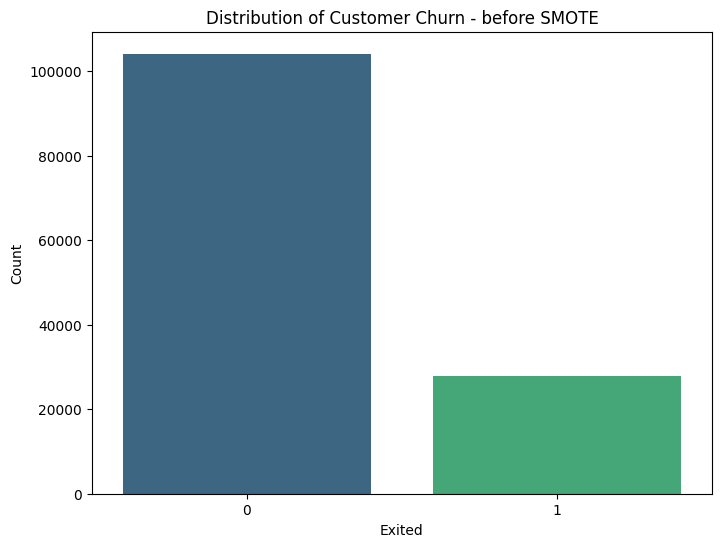

In [ ]:
counts = y_train.value_counts()

# Plot the distribution using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Customer Churn - before SMOTE')
plt.show()

In [ ]:
# Handling class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
print(X_train_res.shape, y_res.shape)

(208180, 11) (208180,)


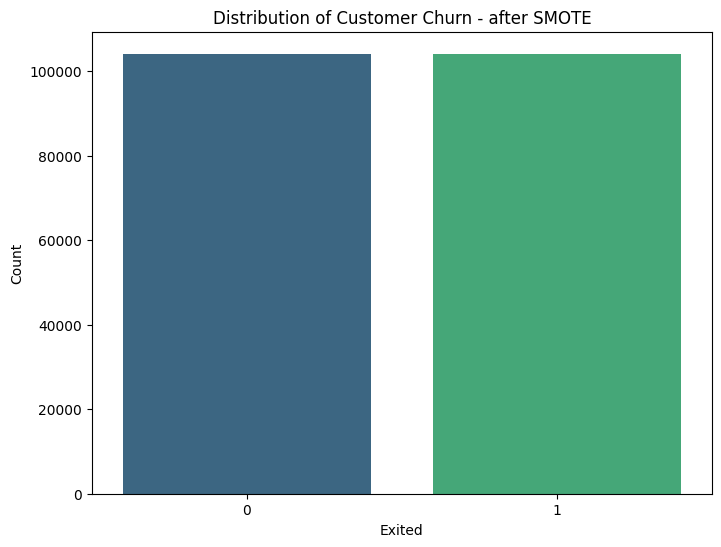

In [ ]:
counts = y_res.value_counts()

# Plot the distribution using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=y_res, palette='viridis')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Customer Churn - after SMOTE')
plt.show()

#### **Standardizing the Data**

In [ ]:
scalar = StandardScaler()
# Fit and transform the training data
X_train_scaled = scalar.fit_transform(X_train_res)
# Transform the validation data
X_val_scaled = scalar.transform(X_val)

In [ ]:
# Converting Scaled Data Back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

In [ ]:
y_train = y_res

## **5. Model Training and Evaluation**

#### **Model Evaluation Function**

In [ ]:
def evaluate_model(model, X_val, y_val, model_name="Model"):
    y_pred = model.predict(X_val)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_val)[:, 1]
    else:
        y_prob = y_pred  # fallback

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc_score = roc_auc_score(y_val, y_prob)

    print(f"Evaluation for {model_name}:")
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("ROC AUC:", auc_score)

    plot_roc_curve(y_val, y_prob, model_name)
    plot_confusion_matrix(y_val, y_pred, model_name)

    # Return all metrics
    return {
        "Model": model_name,
        "AUC": auc_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

def plot_roc_curve(y_val, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_val, y_pred, model_name):
    print("\n")
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
model_eval_results = []

#### **1. Logistic Regression**

Evaluation for Logistic Regression - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     26023
           1       0.48      0.68      0.57      6984

    accuracy                           0.78     33007
   macro avg       0.69      0.74      0.71     33007
weighted avg       0.82      0.78      0.79     33007

ROC AUC: 0.7991744427422758


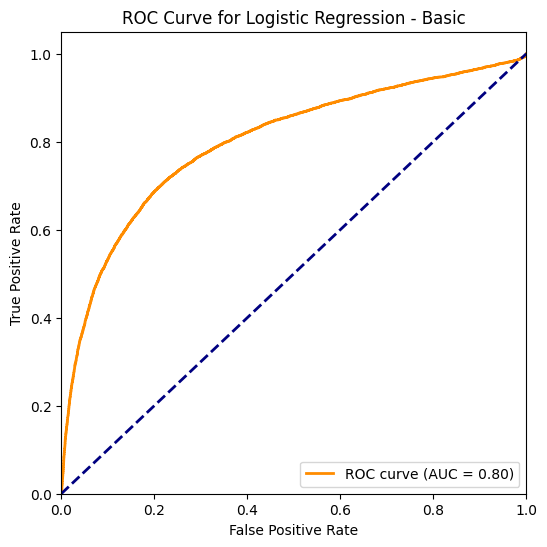

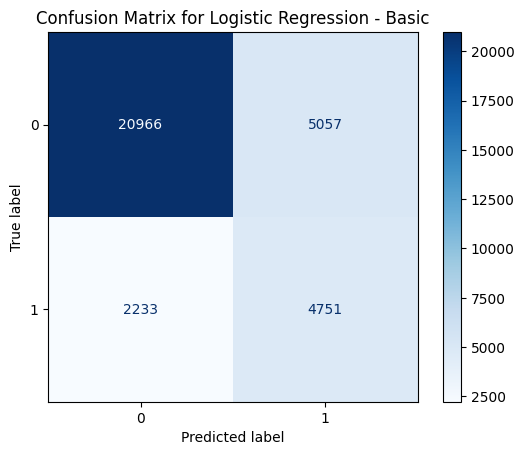

{'Model': 'Logistic Regression - Basic',
 'AUC': np.float64(0.7991744427422758),
 'Accuracy': 0.7791377586572545,
 'Precision': 0.4844004893964111,
 'Recall': 0.6802691867124857}

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
evaluate_model(lr, X_val_scaled, y_val, model_name="Logistic Regression - Basic")

Evaluation for Logistic Regression - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     26023
           1       0.48      0.68      0.57      6984

    accuracy                           0.78     33007
   macro avg       0.69      0.74      0.71     33007
weighted avg       0.81      0.78      0.79     33007

ROC AUC: 0.7992725144146209


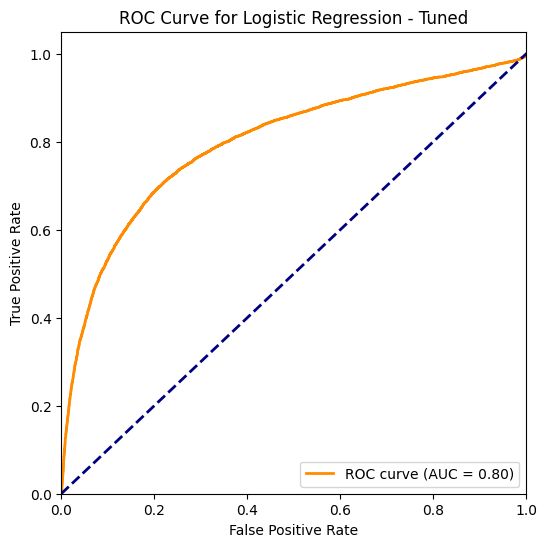

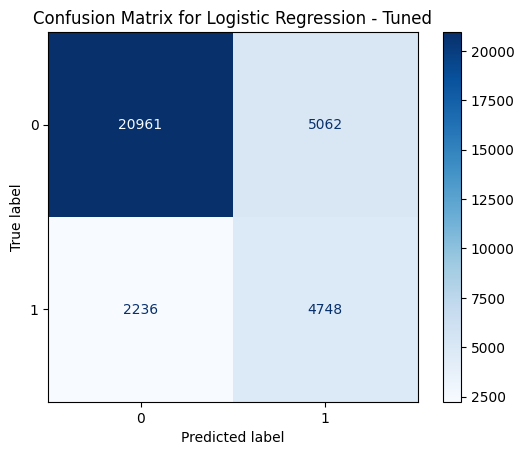

In [ ]:
pipeline_lr = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train)

best_lr = grid_lr.best_estimator_
metrics_lr = evaluate_model(best_lr, X_val_scaled, y_val, model_name="Logistic Regression - Tuned")
model_eval_results.append(metrics_lr)

#### **2. Decision Tree Classifier**

Decision Tree - Basic
Evaluation for Decision Tree - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     26023
           1       0.51      0.55      0.53      6984

    accuracy                           0.80     33007
   macro avg       0.70      0.71      0.70     33007
weighted avg       0.80      0.80      0.80     33007

ROC AUC: 0.7058976492906816


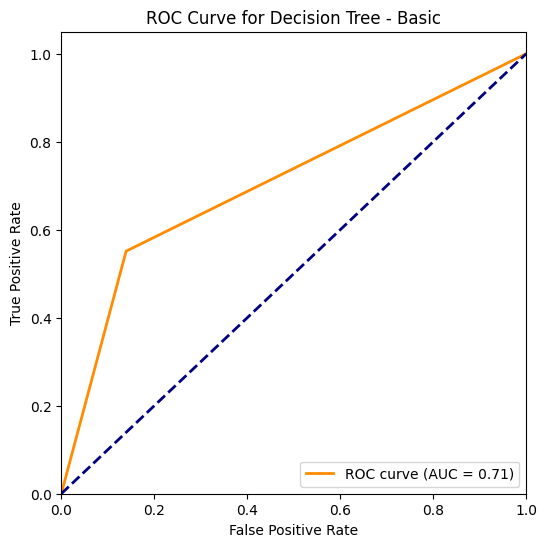

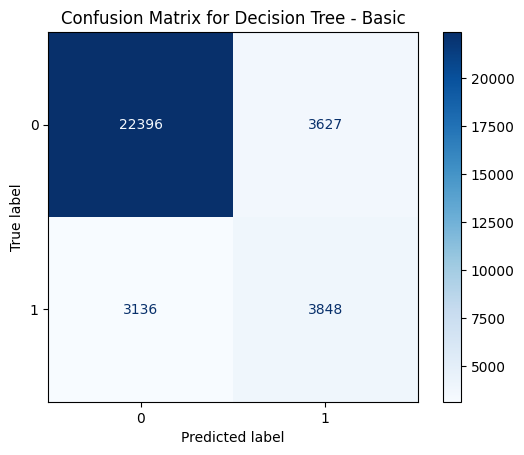

{'Model': 'Decision Tree - Basic',
 'AUC': np.float64(0.7058976492906816),
 'Accuracy': 0.7951040688338837,
 'Precision': 0.5147826086956522,
 'Recall': 0.5509736540664376}

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)
print("Decision Tree - Basic")
evaluate_model(dt, X_val_scaled, y_val, model_name="Decision Tree - Basic")

Decision Tree - Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Evaluation for Decision Tree -Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26023
           1       0.66      0.60      0.63      6984

    accuracy                           0.85     33007
   macro avg       0.78      0.76      0.77     33007
weighted avg       0.85      0.85      0.85     33007

ROC AUC: 0.8755342083500985


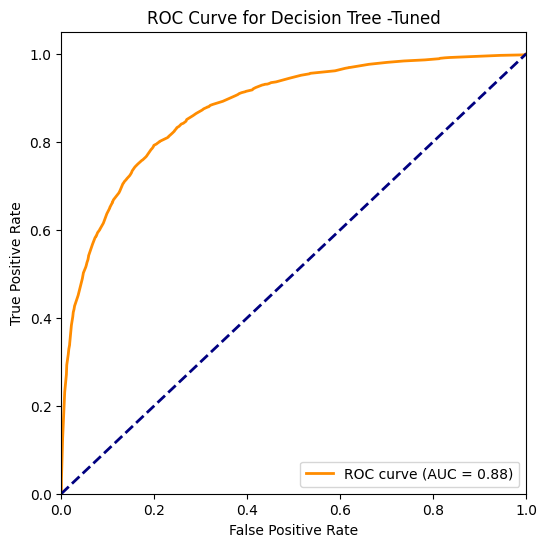

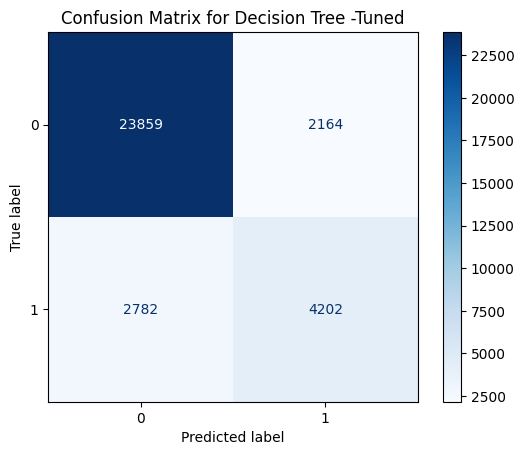

In [ ]:
# Hyperparameter tuning
param_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring='roc_auc', n_jobs=-1)
grid_dt.fit(X_train_scaled, y_train)

print("Decision Tree - Best Params:", grid_dt.best_params_)
auc_dt_tuned = evaluate_model(grid_dt.best_estimator_, X_val_scaled, y_val, model_name = "Decision Tree -Tuned")

model_eval_results.append(auc_dt_tuned)

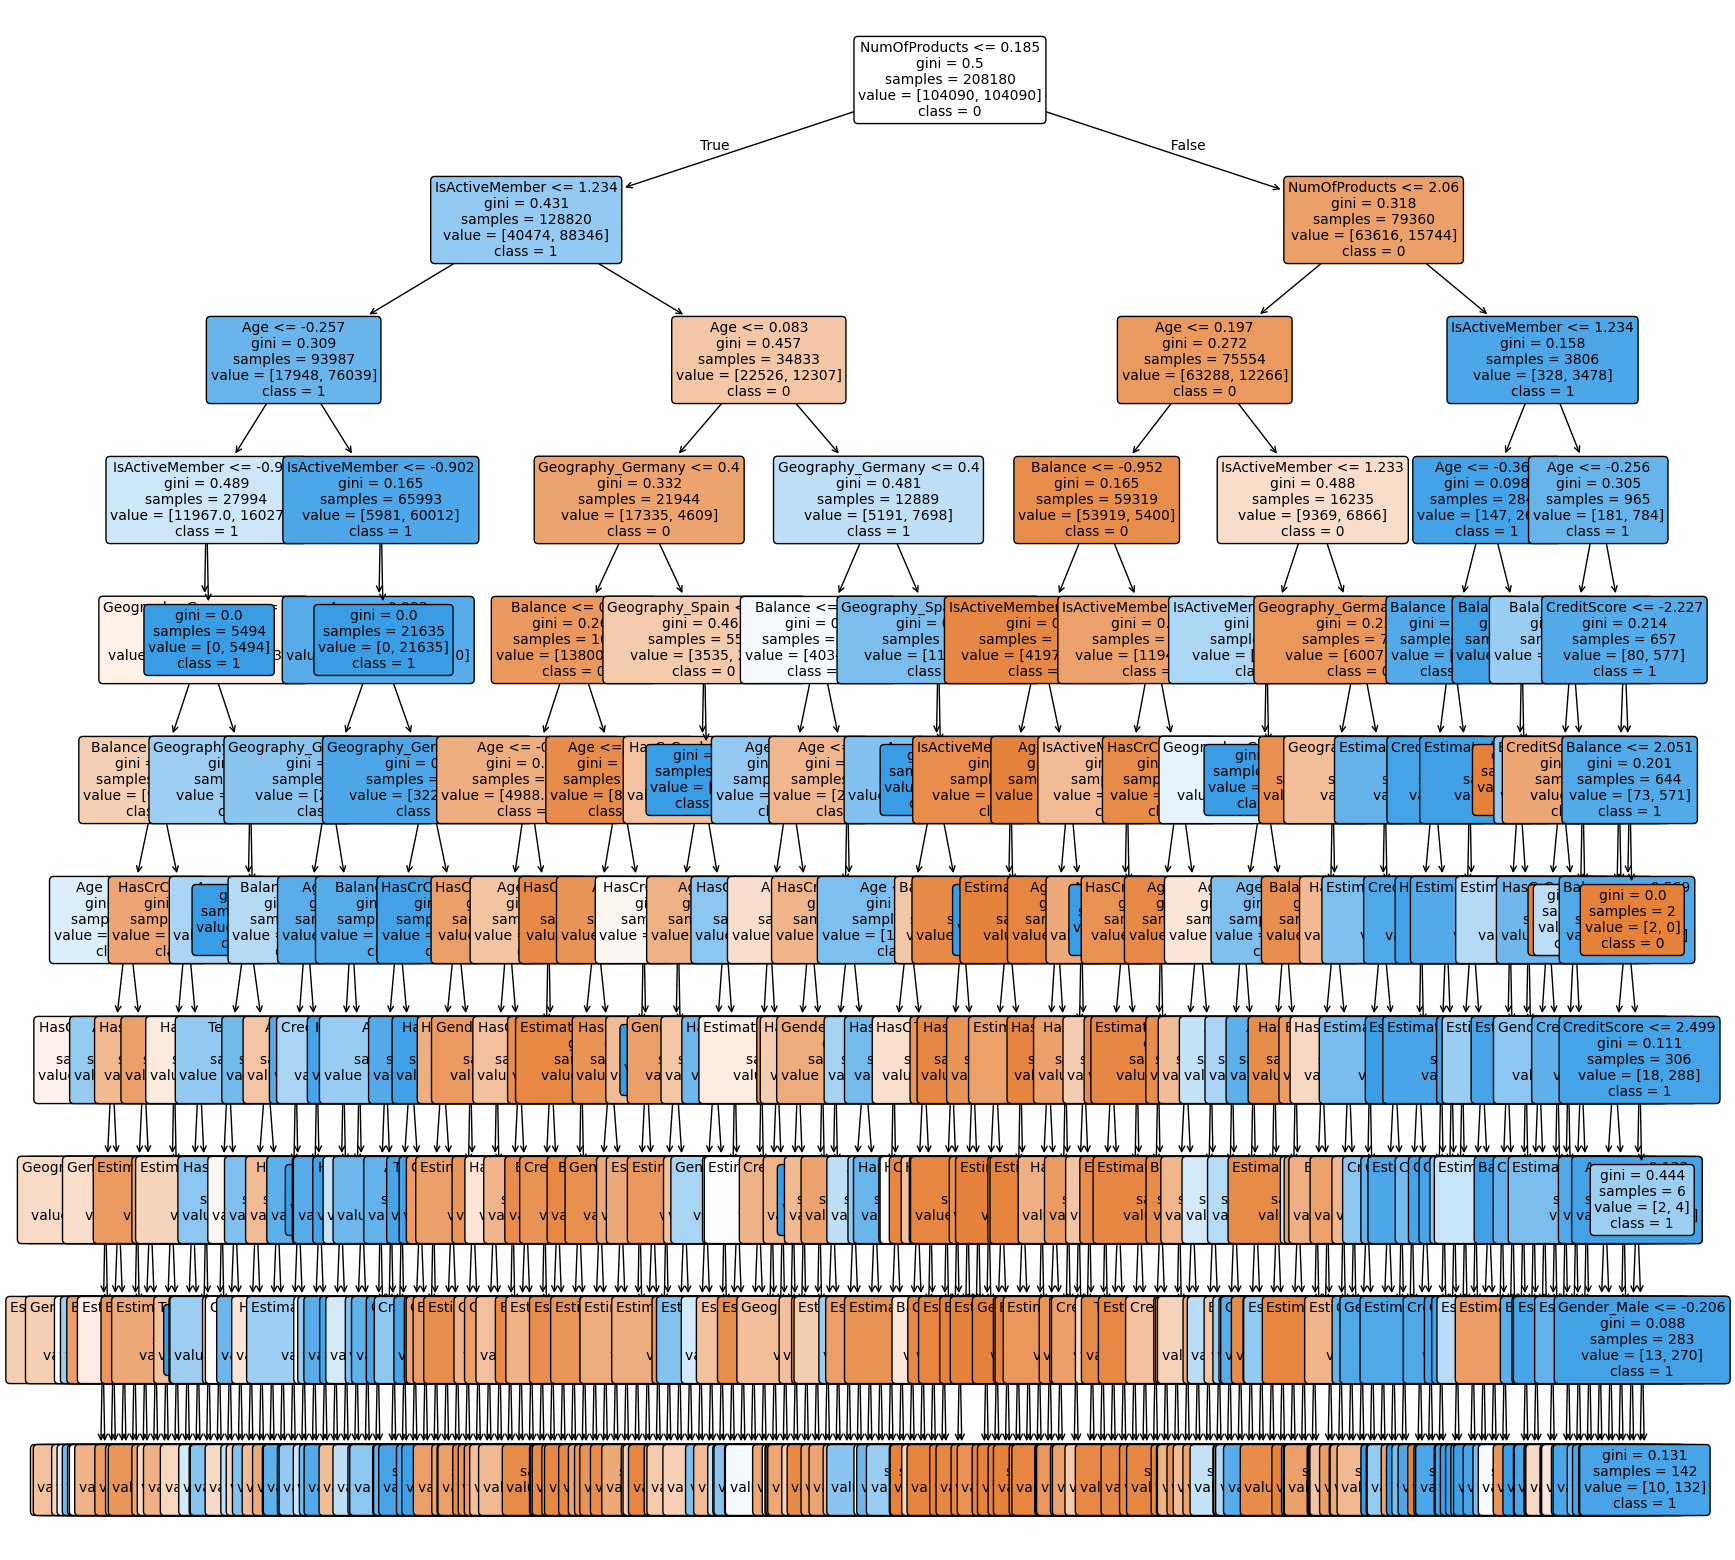

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(grid_dt.best_estimator_, feature_names=X_train.columns, class_names=['0', '1'], filled=True, fontsize=10, rounded=True)
#plt.show()
plt.savefig('tree.png')

#### **3. Random Forest Classifier**

Random Forest - Basic
Evaluation for Random Forest Classifier - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26023
           1       0.67      0.60      0.63      6984

    accuracy                           0.85     33007
   macro avg       0.78      0.76      0.77     33007
weighted avg       0.85      0.85      0.85     33007

ROC AUC: 0.8719762133057112


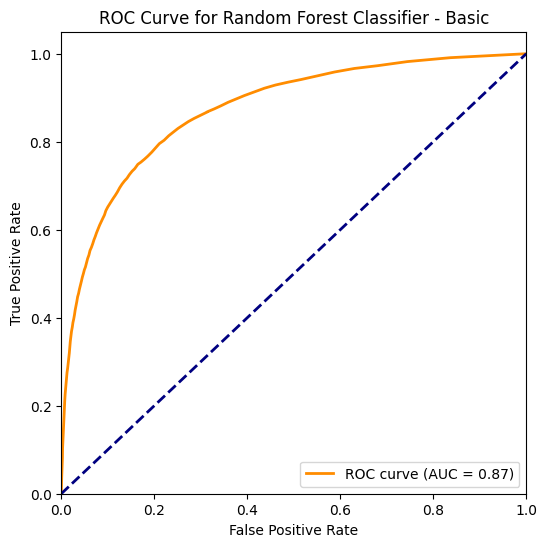

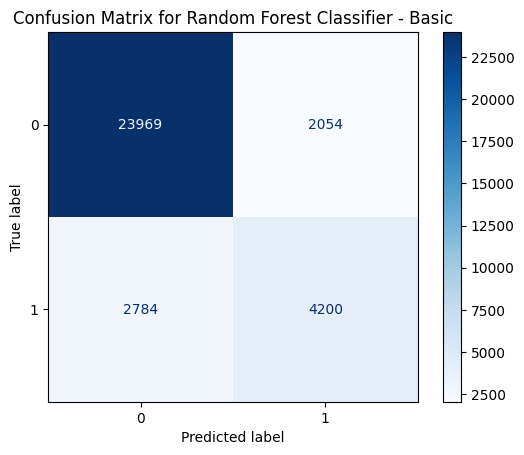

{'Model': 'Random Forest Classifier - Basic',
 'AUC': np.float64(0.8719762133057112),
 'Accuracy': 0.8534250310540188,
 'Precision': 0.6715701950751519,
 'Recall': 0.6013745704467354}

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train_scaled, y_train)
print("Random Forest - Basic")

evaluate_model(rf, X_val_scaled, y_val, model_name="Random Forest Classifier - Basic")

Random Forest - Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Evaluation for Random Forest - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     26023
           1       0.66      0.62      0.64      6984

    accuracy                           0.85     33007
   macro avg       0.78      0.77      0.78     33007
weighted avg       0.85      0.85      0.85     33007

ROC AUC: 0.8791757299329754


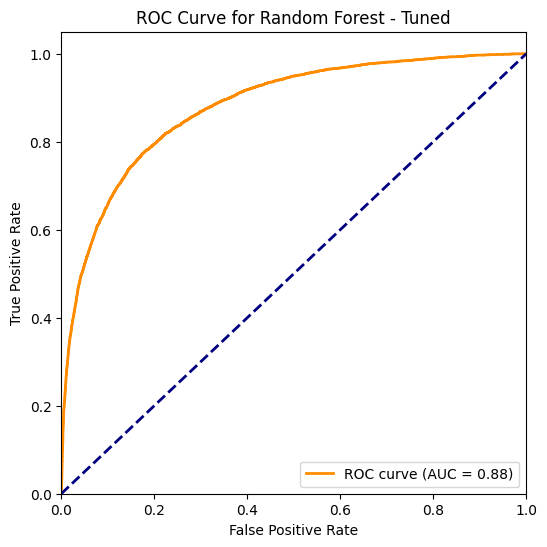

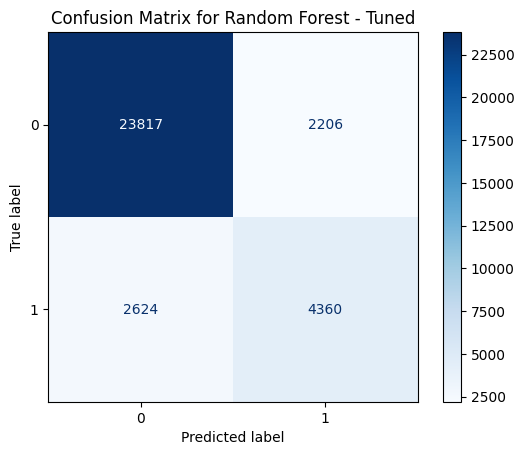

In [ ]:
# Hyperparameter tuning
param_rf = {
    'n_estimators': [100, 200],
    #'max_depth': [None, 10, 20],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

print("Random Forest - Best Params:", grid_rf.best_params_)
auc_rf = evaluate_model(grid_rf.best_estimator_, X_val_scaled, y_val, model_name="Random Forest - Tuned")
model_eval_results.append(auc_rf)

#### **4. KNN Classifier**

KNN - Basic
Evaluation for KNN - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     26023
           1       0.56      0.67      0.61      6984

    accuracy                           0.82     33007
   macro avg       0.73      0.76      0.74     33007
weighted avg       0.83      0.82      0.82     33007

ROC AUC: 0.8327163935163708


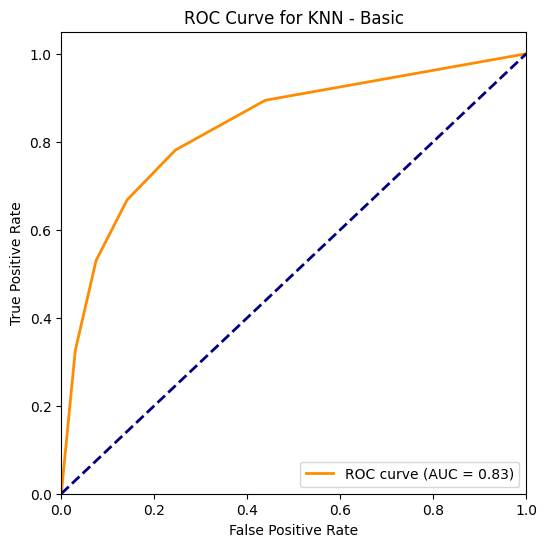

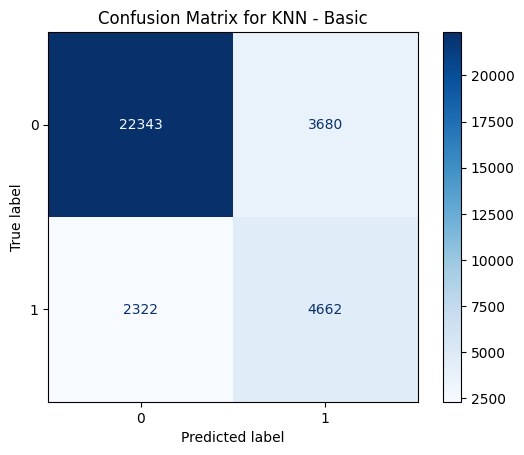

{'Model': 'KNN - Basic',
 'AUC': np.float64(0.8327163935163708),
 'Accuracy': 0.8181597842881813,
 'Precision': 0.5588587868616639,
 'Recall': 0.6675257731958762}

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print("KNN - Basic")
evaluate_model(knn, X_val_scaled, y_val, model_name="KNN - Basic")

KNN - Best Params: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Evaluation for KNN - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     26023
           1       0.59      0.65      0.62      6984

    accuracy                           0.83     33007
   macro avg       0.75      0.77      0.76     33007
weighted avg       0.84      0.83      0.83     33007

ROC AUC: 0.8542081341912755


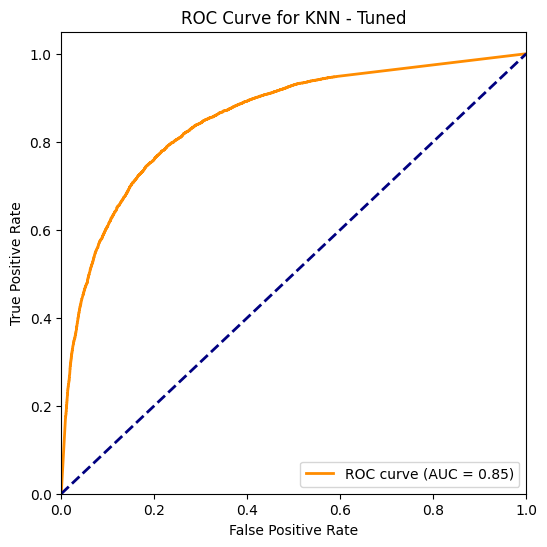

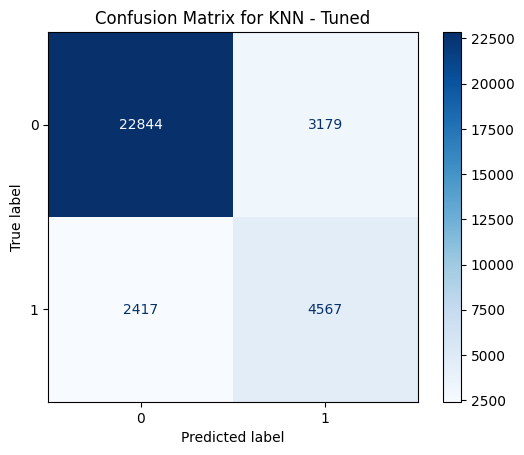

In [ ]:
# Hyperparameter tuning
param_knn = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (1) and Euclidean (2)
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)

print("KNN - Best Params:", grid_knn.best_params_)

auc_knn = evaluate_model(grid_knn.best_estimator_, X_val_scaled, y_val, model_name="KNN - Tuned")
model_eval_results.append(auc_knn)

#### **5. Gradient Boosting**

Gradient Boosting - Basic
Evaluation for Gradient Boosting - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     26023
           1       0.65      0.66      0.65      6984

    accuracy                           0.85     33007
   macro avg       0.78      0.78      0.78     33007
weighted avg       0.85      0.85      0.85     33007

ROC AUC: 0.8820395916837863


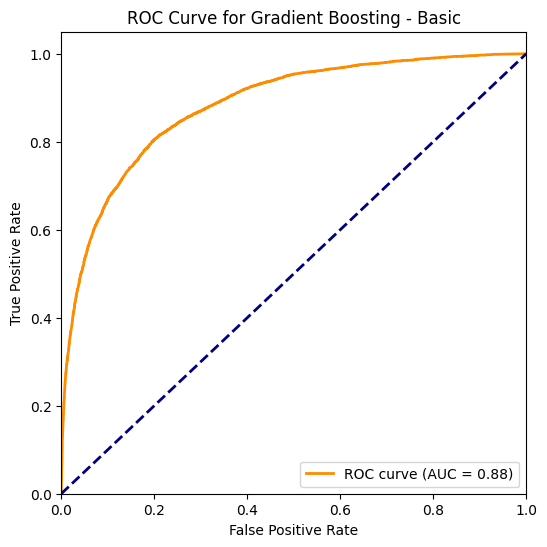

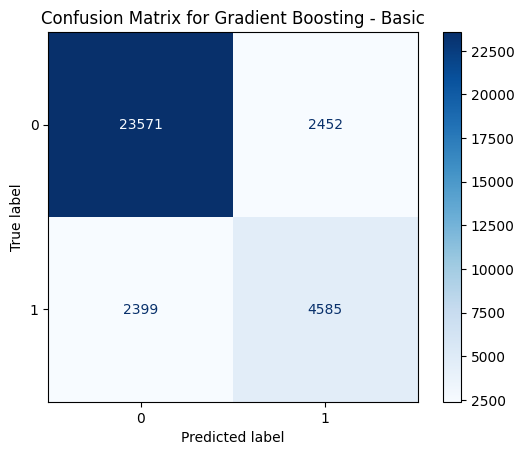

{'Model': 'Gradient Boosting - Basic',
 'AUC': np.float64(0.8820395916837863),
 'Accuracy': 0.8530311752052595,
 'Precision': 0.6515560608213727,
 'Recall': 0.6565005727376861}

In [ ]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_scaled, y_train)
print("Gradient Boosting - Basic")

evaluate_model(gbc, X_val_scaled, y_val, model_name="Gradient Boosting - Basic")

Gradient Boosting - Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Evaluation for Gradient Boosting - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     26023
           1       0.71      0.59      0.65      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.76      0.78     33007
weighted avg       0.86      0.86      0.86     33007

ROC AUC: 0.8882790166809438


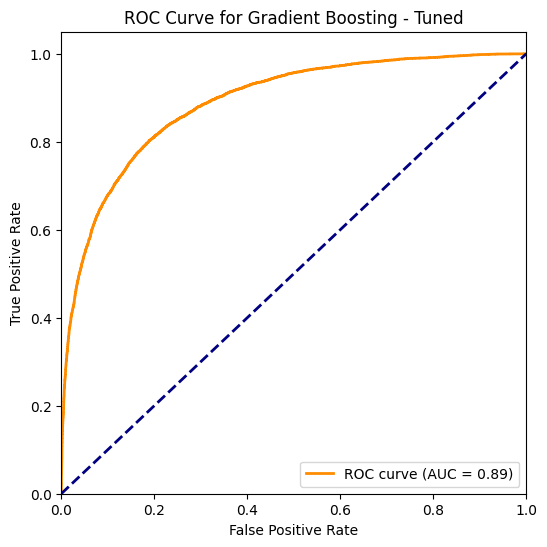

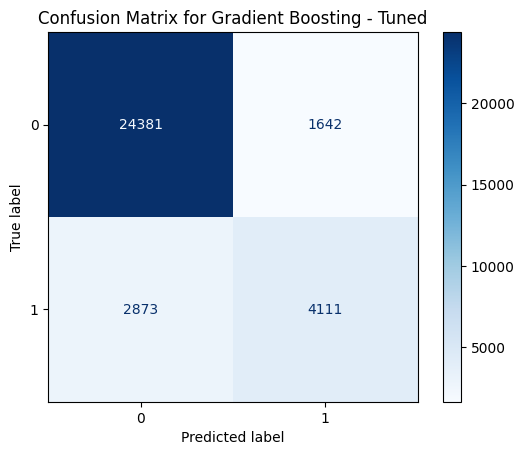

In [ ]:
# Hyperparameter tuning
param_gbc = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_gbc, cv=5, scoring='roc_auc', n_jobs=-1)
grid_gbc.fit(X_train_scaled, y_train)

print("Gradient Boosting - Best Params:", grid_gbc.best_params_)
#evaluate_model(grid_gbc.best_estimator_, X_val_scaled, y_val)

auc_gbc = evaluate_model(grid_gbc.best_estimator_, X_val_scaled, y_val, model_name="Gradient Boosting - Tuned")
#model_auc_scores.append(('Gradient Boosting', auc_gbc))
model_eval_results.append(auc_gbc)

#### **6. Extra Trees Classifier**

Extra Trees - Basic
Evaluation for Extra Trees Classifier - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     26023
           1       0.64      0.61      0.63      6984

    accuracy                           0.85     33007
   macro avg       0.77      0.76      0.76     33007
weighted avg       0.84      0.85      0.84     33007

ROC AUC: 0.8655951610169152


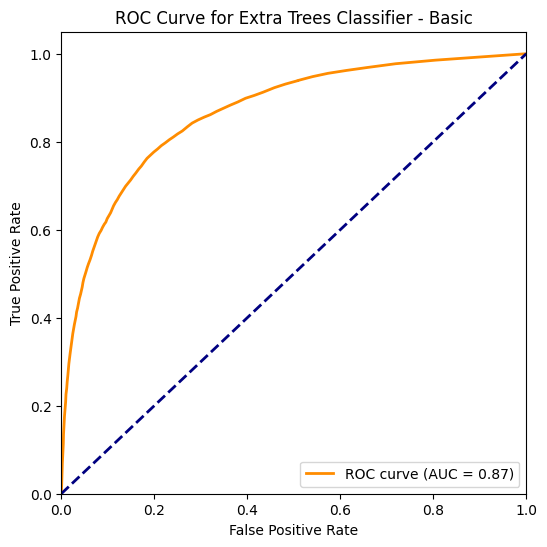

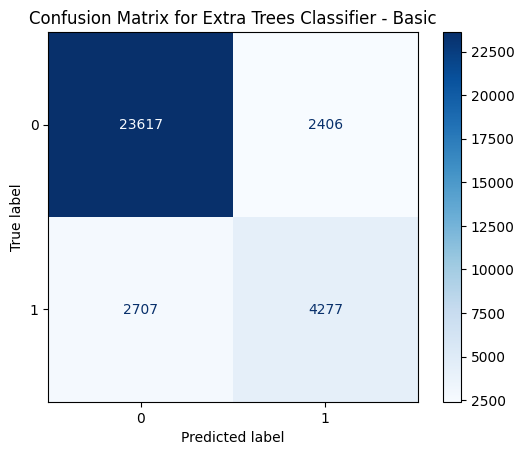

{'Model': 'Extra Trees Classifier - Basic',
 'AUC': np.float64(0.8655951610169152),
 'Accuracy': 0.845093465022571,
 'Precision': 0.639982043992219,
 'Recall': 0.6123997709049256}

In [ ]:
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train_scaled, y_train)
print("Extra Trees - Basic")
#evaluate_model(etc, X_val_scaled, y_val)

evaluate_model(etc, X_val_scaled, y_val, model_name="Extra Trees Classifier - Basic")

Extra Trees - Best Params: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Evaluation for Extra Trees Classifier - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90     26023
           1       0.64      0.61      0.63      6984

    accuracy                           0.85     33007
   macro avg       0.77      0.76      0.77     33007
weighted avg       0.84      0.85      0.84     33007

ROC AUC: 0.8667886515624846


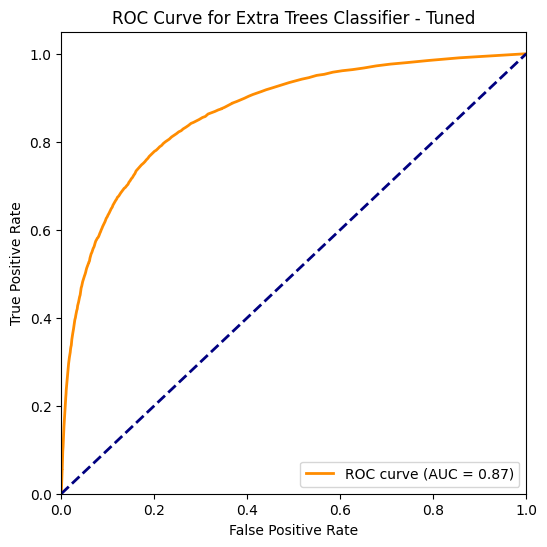

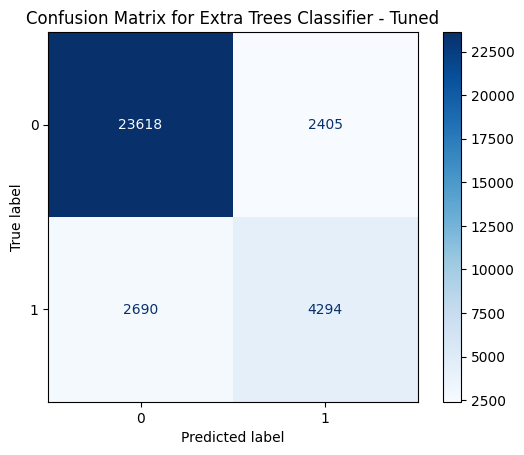

In [ ]:
# Hyperparameter tuning
param_etc = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_etc = GridSearchCV(ExtraTreesClassifier(random_state=42), param_etc, cv=5, scoring='roc_auc', n_jobs=-1)
grid_etc.fit(X_train_scaled, y_train)

print("Extra Trees - Best Params:", grid_etc.best_params_)
#evaluate_model(grid_etc.best_estimator_, X_val_scaled, y_val)

auc_etc = evaluate_model(grid_etc.best_estimator_, X_val_scaled, y_val, model_name="Extra Trees Classifier - Tuned")
#model_auc_scores.append(('Extra Trees Classifier', auc_etc))
model_eval_results.append(auc_etc)

#### **7. Adaboost**

AdaBoost - Basic
Evaluation for AdaBoost - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     26023
           1       0.62      0.66      0.64      6984

    accuracy                           0.84     33007
   macro avg       0.76      0.77      0.77     33007
weighted avg       0.85      0.84      0.84     33007

ROC AUC: 0.8662859957261351


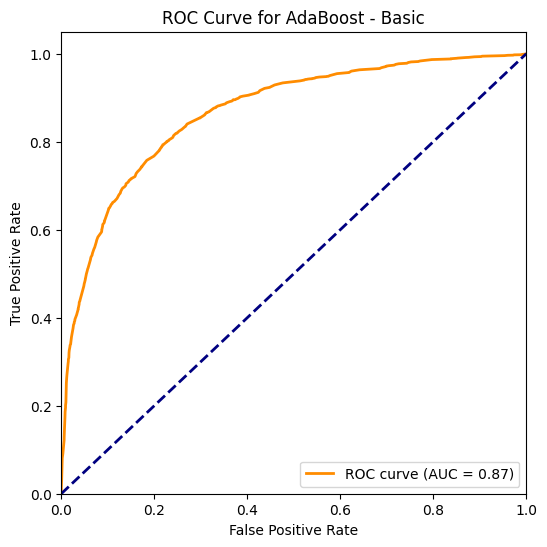

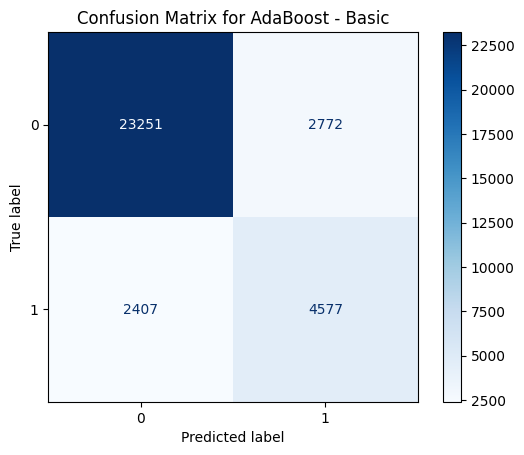

{'Model': 'AdaBoost - Basic',
 'AUC': np.float64(0.8662859957261351),
 'Accuracy': 0.8430938891750235,
 'Precision': 0.622805823921622,
 'Recall': 0.6553550973654066}

In [ ]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train)
print("AdaBoost - Basic")
#evaluate_model(ada, X_val_scaled, y_val)

evaluate_model(ada, X_val_scaled, y_val, model_name="AdaBoost - Basic")

AdaBoost - Best Params: {'learning_rate': 1, 'n_estimators': 200}
Evaluation for Adaboost - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90     26023
           1       0.63      0.66      0.65      6984

    accuracy                           0.85     33007
   macro avg       0.77      0.78      0.77     33007
weighted avg       0.85      0.85      0.85     33007

ROC AUC: 0.8731786257103868


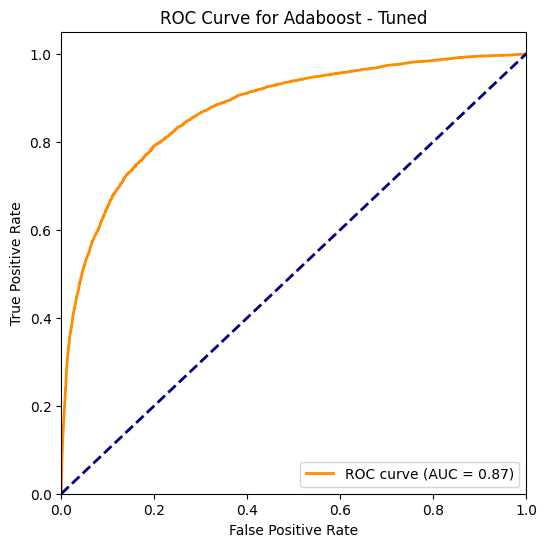

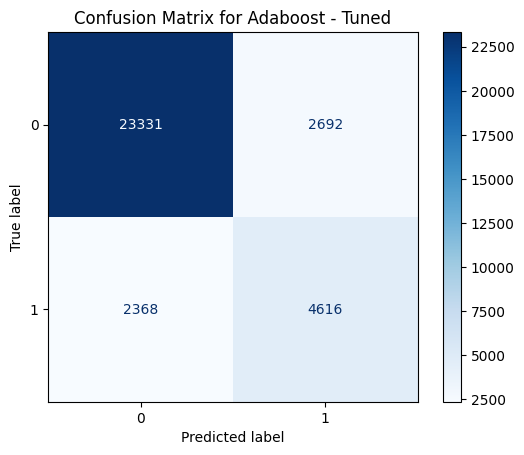

In [ ]:
# Hyperparameter tuning
param_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42, algorithm='SAMME'), param_ada, cv=5, scoring='roc_auc', n_jobs=-1)
grid_ada.fit(X_train_scaled, y_train)

print("AdaBoost - Best Params:", grid_ada.best_params_)
#evaluate_model(grid_ada.best_estimator_, X_val_scaled, y_val)

auc_ada = evaluate_model(grid_ada.best_estimator_, X_val_scaled, y_val, model_name="Adaboost - Tuned")
#model_auc_scores.append(('Adaboost', auc_ada))
model_eval_results.append(auc_ada)

#### **8. Support Vector Classifier**

SVC - Basic
Evaluation for SVC - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     26023
           1       0.63      0.66      0.64      6984

    accuracy                           0.84     33007
   macro avg       0.77      0.78      0.77     33007
weighted avg       0.85      0.84      0.85     33007

ROC AUC: 0.8435964810228893


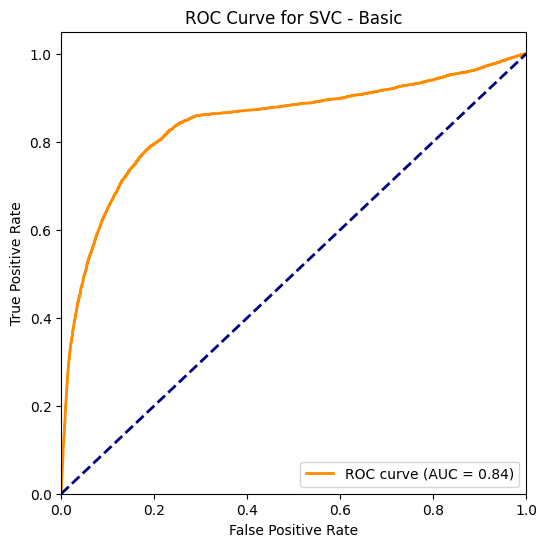

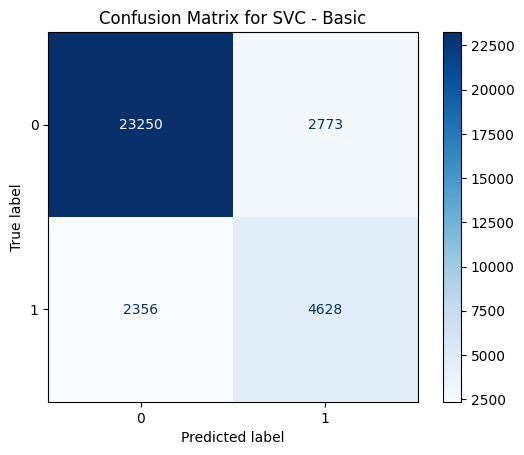

{'Model': 'SVC - Basic',
 'AUC': np.float64(0.8435964810228893),
 'Accuracy': 0.8446087193625594,
 'Precision': 0.6253209025807324,
 'Recall': 0.6626575028636884}

In [ ]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
print("SVC - Basic")
#evaluate_model(svc, X_val_scaled, y_val)

evaluate_model(svc, X_val_scaled, y_val, model_name="SVC - Basic")

#### **9. Linear SVM**

[LibLinear]Linear SVC - Basic
Evaluation for Linear SVC - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     26023
           1       0.48      0.68      0.57      6984

    accuracy                           0.78     33007
   macro avg       0.69      0.74      0.71     33007
weighted avg       0.82      0.78      0.79     33007

ROC AUC: 0.743333770100016


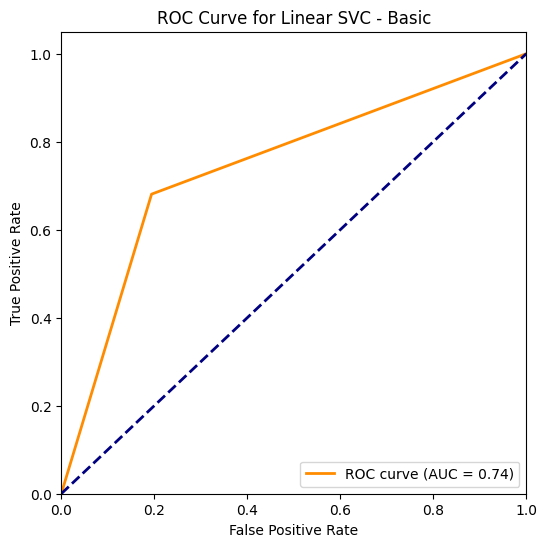

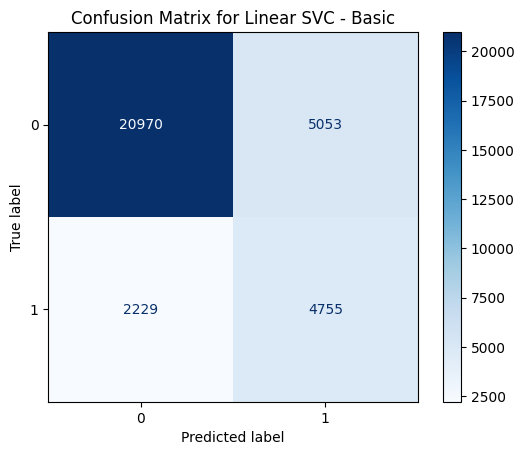

{'Model': 'Linear SVC - Basic',
 'AUC': np.float64(0.743333770100016),
 'Accuracy': 0.7793801314872603,
 'Precision': 0.4848083197389886,
 'Recall': 0.6808419243986255}

In [ ]:
lsvc = LinearSVC(max_iter=10000, random_state=42, verbose =1)
lsvc.fit(X_train_scaled, y_train)
print("Linear SVC - Basic")
#evaluate_model(lsvc, X_val_scaled, y_val)

evaluate_model(lsvc, X_val_scaled, y_val, model_name="Linear SVC - Basic")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Linear SVC - Best Params: {'C': 0.1, 'dual': True, 'loss': 'hinge'}
Evaluation for Linear SVC - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86     26023
           1       0.49      0.67      0.57      6984

    accuracy                           0.79     33007
   macro avg       0.70      0.74      0.71     33007
weighted avg       0.82      0.79      0.80     33007

ROC AUC: 0.7436340045520573


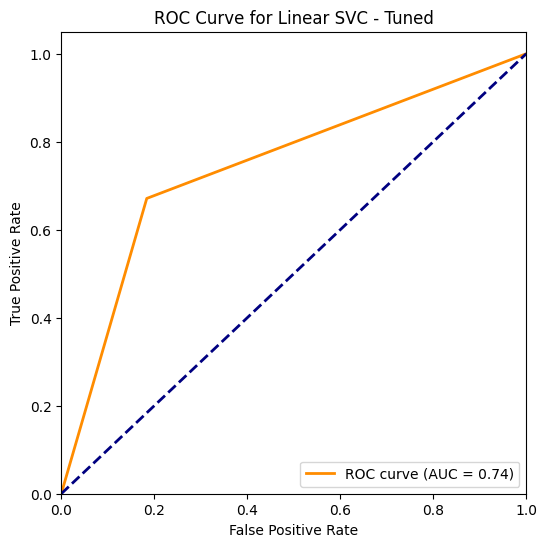

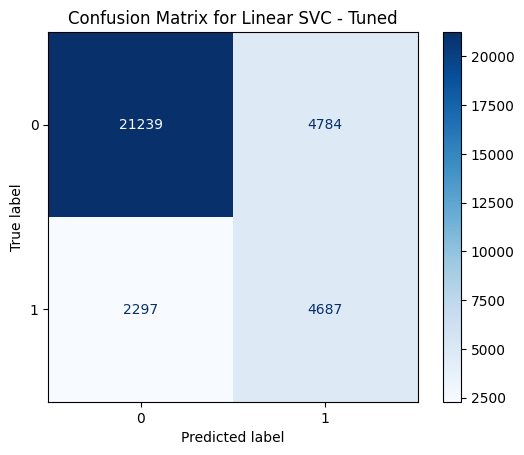

In [ ]:
# Hyperparameter tuning
param_lsvc = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [False, True]
}

grid_lsvc = GridSearchCV(LinearSVC(max_iter=20000, random_state=42), param_lsvc, cv=5, scoring='f1', n_jobs=-1, verbose = 1)
grid_lsvc.fit(X_train_scaled, y_train)

print("Linear SVC - Best Params:", grid_lsvc.best_params_)
#evaluate_model(grid_lsvc.best_estimator_, X_val_scaled, y_val)

auc_lsvc = evaluate_model(grid_lsvc.best_estimator_, X_val_scaled, y_val, model_name="Linear SVC - Tuned")
#model_auc_scores.append(('Linear SVC', auc_lsvc))
model_eval_results.append(auc_lsvc)

#### **10. Gausian Naive Bayes**

GaussianNB - Basic
Evaluation for Gaussian Naive Bayes:
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83     26023
           1       0.44      0.66      0.53      6984

    accuracy                           0.75     33007
   macro avg       0.67      0.72      0.68     33007
weighted avg       0.80      0.75      0.77     33007

ROC AUC: 0.7838233263472674


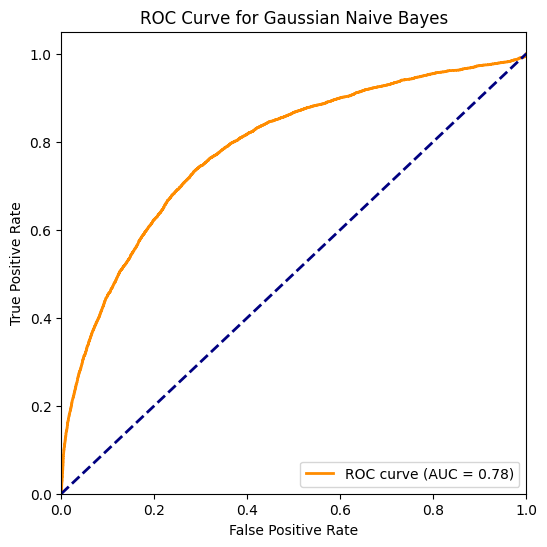

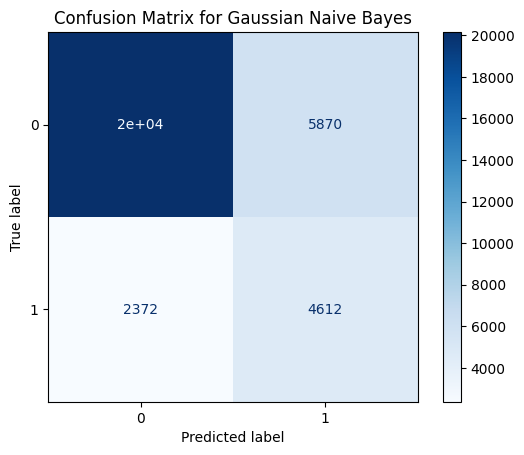

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print("GaussianNB - Basic")
#evaluate_model(gnb, X_val_scaled, y_val)

auc_gnb = evaluate_model(gnb, X_val_scaled, y_val, model_name="Gaussian Naive Bayes")
#model_auc_scores.append(('Guassian Naive Bayes', gnb))
model_eval_results.append(auc_gnb)

#### **11. SGD Classifier**

-- Epoch 1
Norm: 1.95, NNZs: 11, Bias: -0.036703, T: 208180, Avg. loss: 0.910667
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 11, Bias: 0.037953, T: 416360, Avg. loss: 0.528147
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 1.68, NNZs: 11, Bias: -0.016047, T: 624540, Avg. loss: 0.507014
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 1.61, NNZs: 11, Bias: -0.128021, T: 832720, Avg. loss: 0.498029
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 11, Bias: -0.156333, T: 1040900, Avg. loss: 0.493365
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 1.47, NNZs: 11, Bias: -0.207795, T: 1249080, Avg. loss: 0.490608
Total training time: 0.33 seconds.
-- Epoch 7
Norm: 1.50, NNZs: 11, Bias: -0.004639, T: 1457260, Avg. loss: 0.488613
Total training time: 0.38 seconds.
-- Epoch 8
Norm: 1.53, NNZs: 11, Bias: -0.038198, T: 1665440, Avg. loss: 0.487145
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 1.48, NNZs: 11, Bias: -0.005539, T: 1873620, Avg. lo

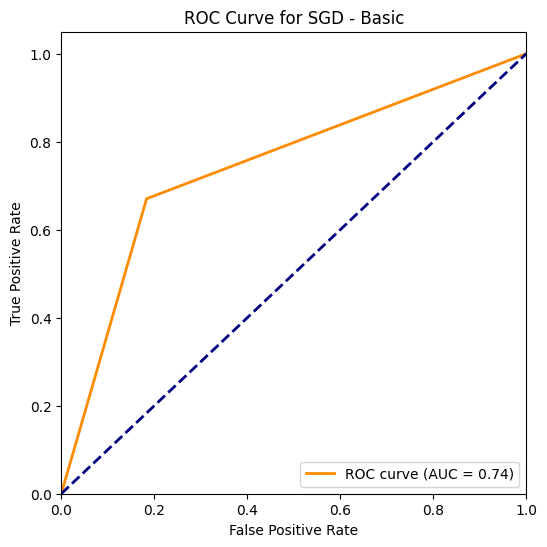

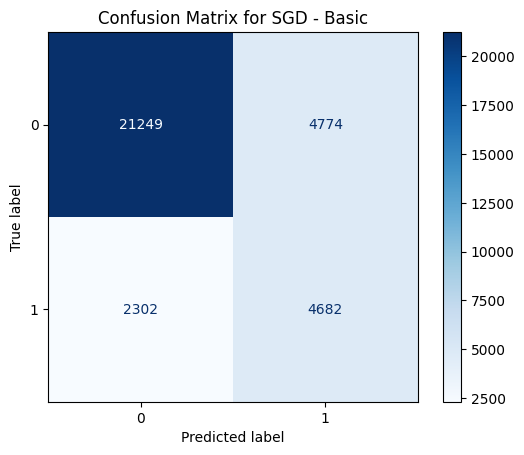

{'Model': 'SGD - Basic',
 'AUC': np.float64(0.7434681812225408),
 'Accuracy': 0.7856212318599085,
 'Precision': 0.49513536379018613,
 'Recall': 0.670389461626575}

In [ ]:
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, verbose = 1)
sgd.fit(X_train_scaled, y_train)
print("SGDClassifier - Basic")
#evaluate_model(sgd, X_val_scaled, y_val)

evaluate_model(sgd, X_val_scaled, y_val, model_name="SGD - Basic")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SGD - Best Params: {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
Evaluation for SGD - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86     26023
           1       0.49      0.68      0.57      6984

    accuracy                           0.79     33007
   macro avg       0.70      0.75      0.71     33007
weighted avg       0.82      0.79      0.80     33007

ROC AUC: 0.7451266648689796


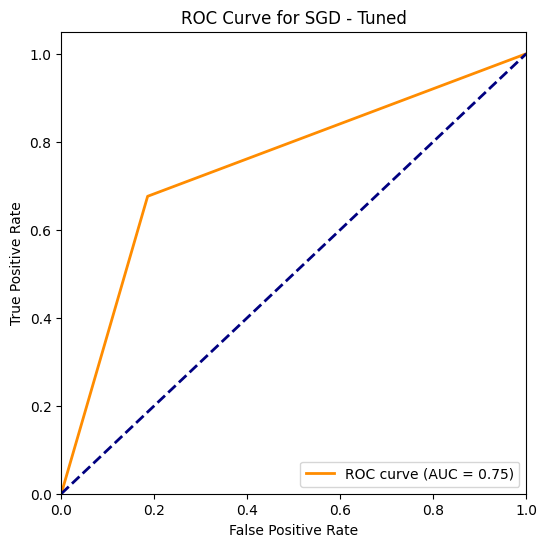

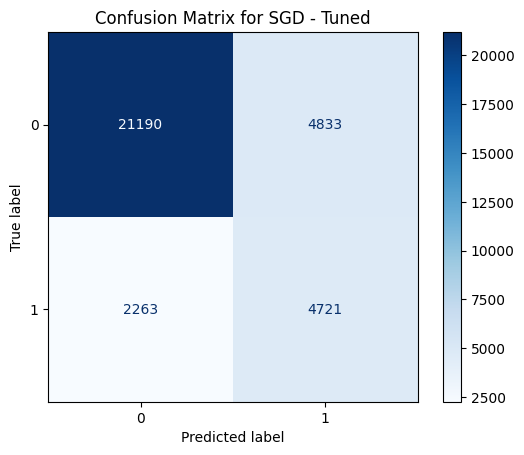

In [ ]:
# Hyperparameter tuning
param_sgd = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_sgd = GridSearchCV(SGDClassifier(max_iter=1000, tol=1e-3, random_state=42), param_sgd, cv=5, scoring='f1', n_jobs=-1, verbose = 1)
grid_sgd.fit(X_train_scaled, y_train)

print("SGD - Best Params:", grid_sgd.best_params_)
#evaluate_model(grid_sgd.best_estimator_, X_val_scaled, y_val)

auc_sgd = evaluate_model(grid_sgd.best_estimator_, X_val_scaled, y_val, model_name="SGD - Tuned")
#model_auc_scores.append(('Stochastic Gradient Descent', auc_sgd))
model_eval_results.append(auc_sgd)

#### **12. MLP Classifier -NN**

Iteration 1, loss = 0.39989258
Iteration 2, loss = 0.33769542
Iteration 3, loss = 0.31998720
Iteration 4, loss = 0.31129433
Iteration 5, loss = 0.30580343
Iteration 6, loss = 0.30213522
Iteration 7, loss = 0.29932534
Iteration 8, loss = 0.29691638
Iteration 9, loss = 0.29538090
Iteration 10, loss = 0.29386445
Iteration 11, loss = 0.29282981
Iteration 12, loss = 0.29187632
Iteration 13, loss = 0.29111591
Iteration 14, loss = 0.29042884
Iteration 15, loss = 0.28978805
Iteration 16, loss = 0.28935166
Iteration 17, loss = 0.28852859
Iteration 18, loss = 0.28805580
Iteration 19, loss = 0.28777821
Iteration 20, loss = 0.28755775
Iteration 21, loss = 0.28720830
Iteration 22, loss = 0.28653442
Iteration 23, loss = 0.28635242
Iteration 24, loss = 0.28623783
Iteration 25, loss = 0.28574674
Iteration 26, loss = 0.28552485
Iteration 27, loss = 0.28546763
Iteration 28, loss = 0.28509619
Iteration 29, loss = 0.28494813
Iteration 30, loss = 0.28466050
Iteration 31, loss = 0.28460999
Iteration 32, los

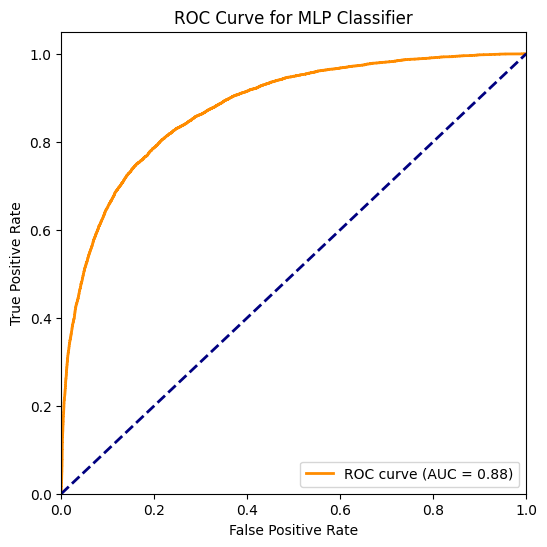

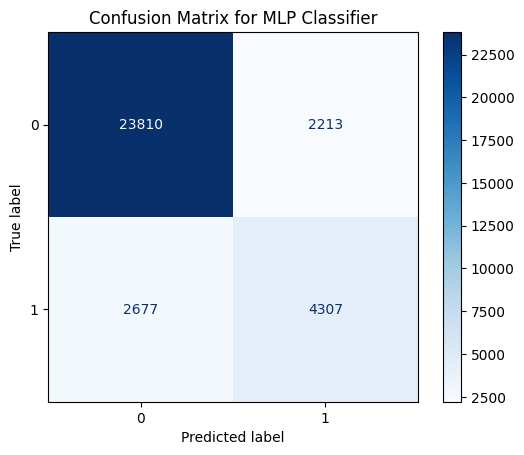

{'Model': 'MLP Classifier',
 'AUC': np.float64(0.8768395976614044),
 'Accuracy': 0.8518496076589814,
 'Precision': 0.6605828220858896,
 'Recall': 0.6166953035509737}

In [ ]:
mlp = MLPClassifier(random_state=42, max_iter=1000, verbose = 1)
mlp.fit(X_train_scaled, y_train)
print("MLPClassifier - Basic")
#evaluate_model(mlp, X_val_scaled, y_val)

evaluate_model(mlp, X_val_scaled, y_val, model_name="MLP Classifier")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
MLP - Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Evaluation for MLP - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     26023
           1       0.65      0.64      0.65      6984

    accuracy                           0.85     33007
   macro avg       0.78      0.77      0.78     33007
weighted avg       0.85      0.85      0.85     33007

ROC AUC: 0.8792939920228291


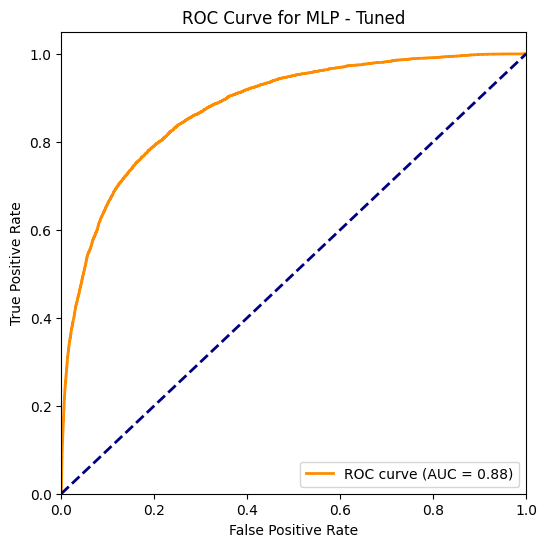

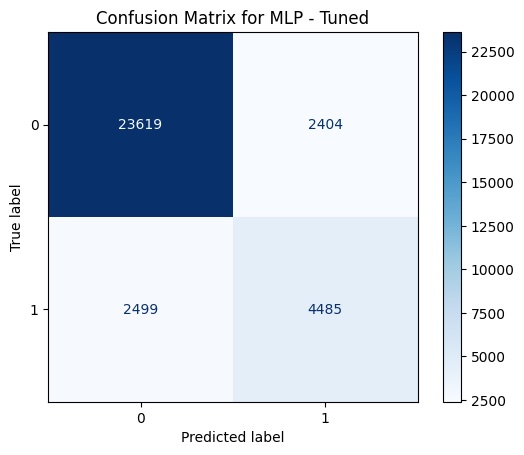

In [ ]:
# Hyperparameter tuning
param_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), param_mlp, cv=5, scoring='roc_auc', n_jobs=-1, verbose = 1)
grid_mlp.fit(X_train_scaled, y_train)

print("MLP - Best Params:", grid_mlp.best_params_)
#evaluate_model(grid_mlp.best_estimator_, X_val_scaled, y_val)
auc_mlp = evaluate_model(grid_mlp.best_estimator_, X_val_scaled, y_val, model_name="MLP - Tuned")
#model_auc_scores.append(('MLP', auc_mlp))
model_eval_results.append(auc_mlp)

#### **13. XGBoost**

XGBoost - Basic
Evaluation for XGB - Basic:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     26023
           1       0.70      0.61      0.65      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.77      0.78     33007
weighted avg       0.86      0.86      0.86     33007

ROC AUC: 0.8858620236992749


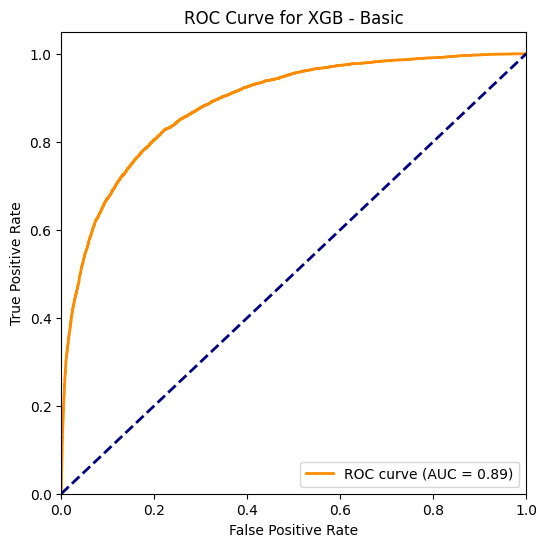

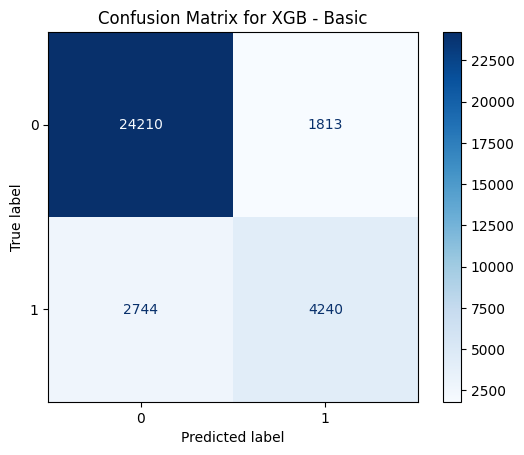

{'Model': 'XGB - Basic',
 'AUC': np.float64(0.8858620236992749),
 'Accuracy': 0.861938376707971,
 'Precision': 0.7004791012720964,
 'Recall': 0.6071019473081328}

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbose = 1)
xgb.fit(X_train_scaled, y_train)
print("XGBoost - Basic")
#evaluate_model(xgb, X_val_scaled, y_val)

evaluate_model(xgb, X_val_scaled, y_val, model_name="XGB - Basic")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
XGBoost - Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Evaluation for XGB - Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     26023
           1       0.70      0.60      0.65      6984

    accuracy                           0.86     33007
   macro avg       0.80      0.77      0.78     33007
weighted avg       0.86      0.86      0.86     33007

ROC AUC: 0.8866593539885129


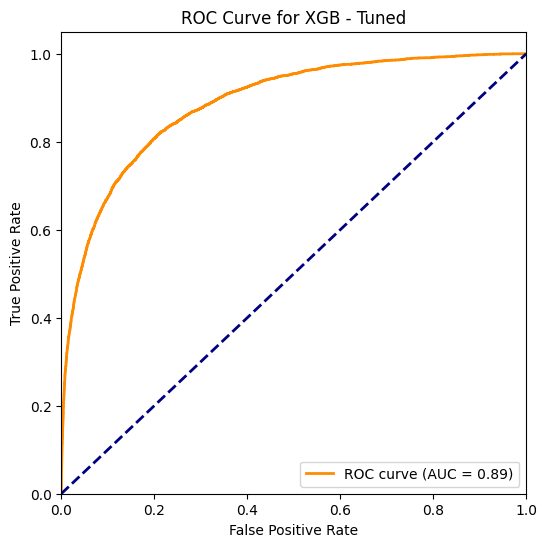

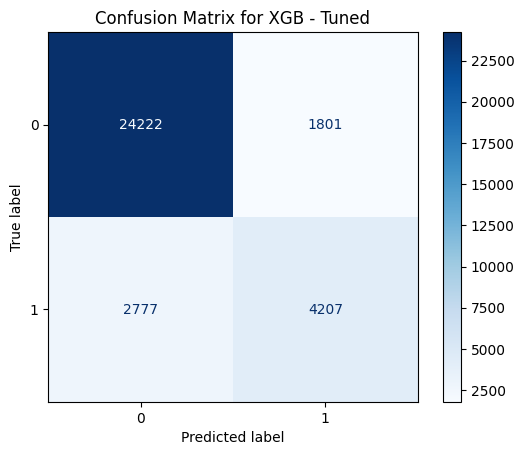

In [ ]:
# Hyperparameter tuning
param_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_xgb, cv=3, scoring='roc_auc', n_jobs=-1, verbose = 1)
grid_xgb.fit(X_train_scaled, y_train)

print("XGBoost - Best Params:", grid_xgb.best_params_)
#evaluate_model(grid_xgb.best_estimator_, X_val_scaled, y_val)
auc_xgb = evaluate_model(grid_xgb.best_estimator_, X_val_scaled, y_val, model_name="XGB - Tuned")
#model_auc_scores.append(('XGB', auc_xgb))
model_eval_results.append(auc_xgb)

#### **14. Catboost**

Learning rate set to 0.100672
0:	learn: 0.5835378	total: 99.7ms	remaining: 1m 39s
1:	learn: 0.5133333	total: 145ms	remaining: 1m 12s
2:	learn: 0.4707320	total: 192ms	remaining: 1m 3s
3:	learn: 0.4341424	total: 236ms	remaining: 58.7s
4:	learn: 0.3937899	total: 279ms	remaining: 55.6s
5:	learn: 0.3763405	total: 326ms	remaining: 54s
6:	learn: 0.3621450	total: 370ms	remaining: 52.6s
7:	learn: 0.3510197	total: 419ms	remaining: 52s
8:	learn: 0.3410704	total: 466ms	remaining: 51.3s
9:	learn: 0.3331185	total: 537ms	remaining: 53.1s
10:	learn: 0.3271071	total: 580ms	remaining: 52.1s
11:	learn: 0.3224011	total: 625ms	remaining: 51.4s
12:	learn: 0.3187360	total: 668ms	remaining: 50.7s
13:	learn: 0.3072555	total: 713ms	remaining: 50.2s
14:	learn: 0.3042490	total: 756ms	remaining: 49.7s
15:	learn: 0.3018877	total: 799ms	remaining: 49.2s
16:	learn: 0.2991628	total: 847ms	remaining: 49s
17:	learn: 0.2920724	total: 890ms	remaining: 48.5s
18:	learn: 0.2891678	total: 935ms	remaining: 48.3s
19:	learn: 0.2

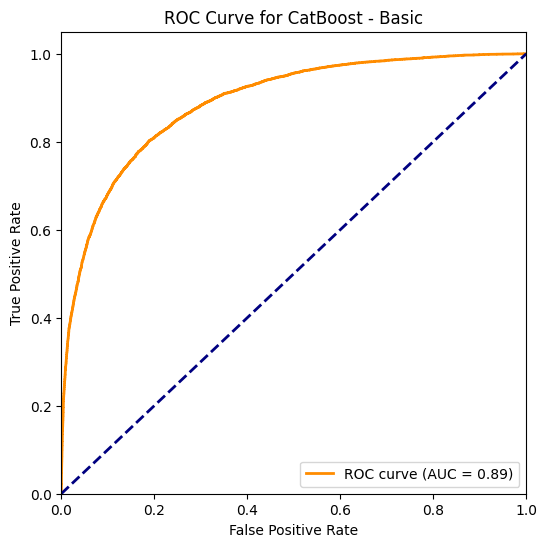

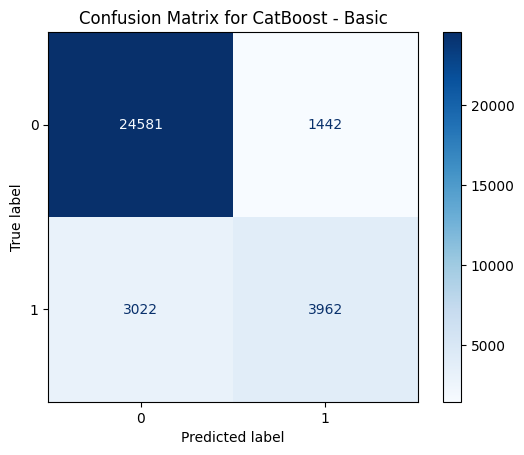

{'Model': 'CatBoost - Basic',
 'AUC': np.float64(0.8886739444387002),
 'Accuracy': 0.864755960856788,
 'Precision': 0.7331606217616581,
 'Recall': 0.5672966781214204}

In [ ]:
cat = CatBoostClassifier(verbose=1, random_state=42)
cat.fit(X_train_scaled, y_train)
print("CatBoost - Basic")
#evaluate_model(cat, X_val_scaled, y_val)
evaluate_model(cat, X_val_scaled, y_val, model_name="CatBoost - Basic")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
CatBoost - Best Params: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Evaluation for CatBoost- Tuned:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     26023
           1       0.72      0.59      0.65      6984

    accuracy                           0.86     33007
   macro avg       0.81      0.77      0.78     33007
weighted avg       0.86      0.86      0.86     33007

ROC AUC: 0.8884358878891125


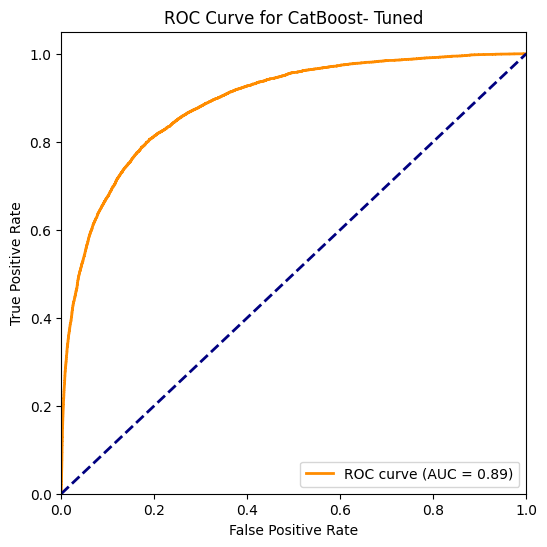

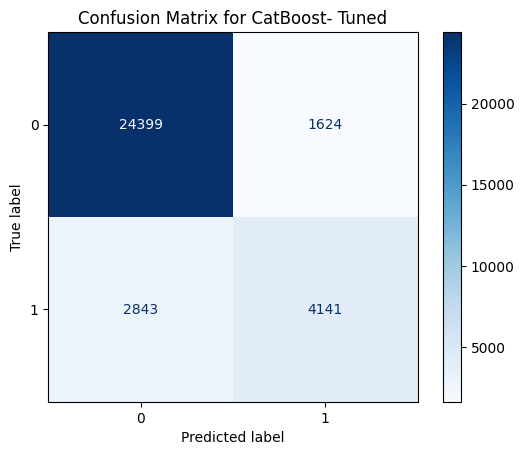

In [ ]:
param_cat = {
    'depth': [4, 6],
    'learning_rate': [0.01, 0.1],
    'iterations': [100, 200]
}

grid_cat = GridSearchCV(CatBoostClassifier(verbose=0, random_state=42), param_cat, cv=3, scoring='roc_auc', n_jobs=-1, verbose = 1)
grid_cat.fit(X_train_scaled, y_train)

print("CatBoost - Best Params:", grid_cat.best_params_)
#evaluate_model(grid_cat.best_estimator_, X_val_scaled, y_val)

auc_cat = evaluate_model(grid_cat.best_estimator_, X_val_scaled, y_val, model_name="CatBoost- Tuned")
#model_auc_scores.append(('Catboost', auc_cat))
model_eval_results.append(auc_cat)

#### **15. Bagging Classifier**

Bagging - Basic
Evaluation for Bagging Clasifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     26023
           1       0.68      0.53      0.60      6984

    accuracy                           0.85     33007
   macro avg       0.78      0.73      0.75     33007
weighted avg       0.84      0.85      0.84     33007

ROC AUC: 0.8387790264969146


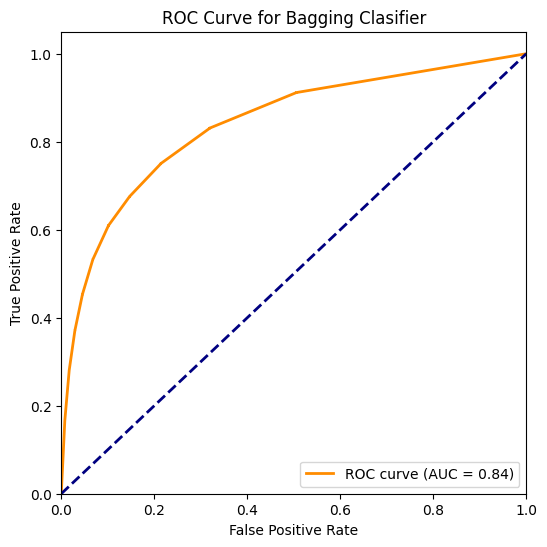

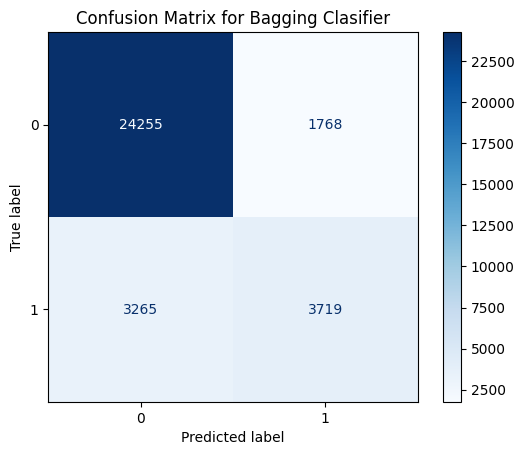

In [ ]:
bagging = BaggingClassifier(random_state=42, verbose = 1)
bagging.fit(X_train_scaled, y_train)
print("Bagging - Basic")
#evaluate_model(bagging, X_val_scaled, y_val)

auc_bagging = evaluate_model(bagging, X_val_scaled, y_val, model_name="Bagging Clasifier")
#model_auc_scores.append(('Bagging Clasifier', auc_bagging))
model_eval_results.append(auc_bagging)

## **6. Models Comparison**

In [ ]:
def plot_all_metrics_grouped(metrics_list):
    df = pd.DataFrame(metrics_list)

    # Melt the DataFrame for seaborn compatibility
    df_melted = df.melt(id_vars="Model",
                        value_vars=["AUC", "Accuracy", "Precision", "Recall"],
                        var_name="Metric",
                        value_name="Score")

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")

    plt.title("Comparison of Models Across Evaluation Metrics")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Metric")
    plt.tight_layout()
    plt.show()


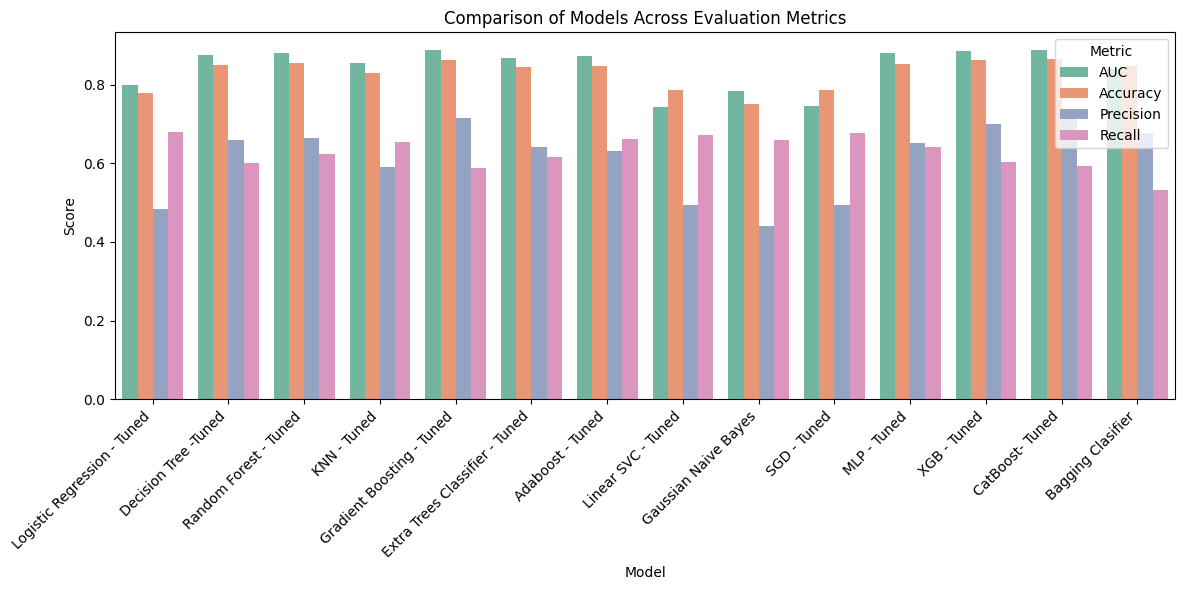

In [ ]:
plot_all_metrics_grouped(model_eval_results)

In [ ]:
def plot_auc_comparison(metrics_list):
    df = pd.DataFrame(metrics_list)

    if "AUC" not in df.columns:
        print("AUC scores not found.")
        return

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="Model", y="AUC", palette="viridis")
    plt.title("AUC Score Comparison")
    plt.xlabel("Model")
    plt.ylabel("AUC Score")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


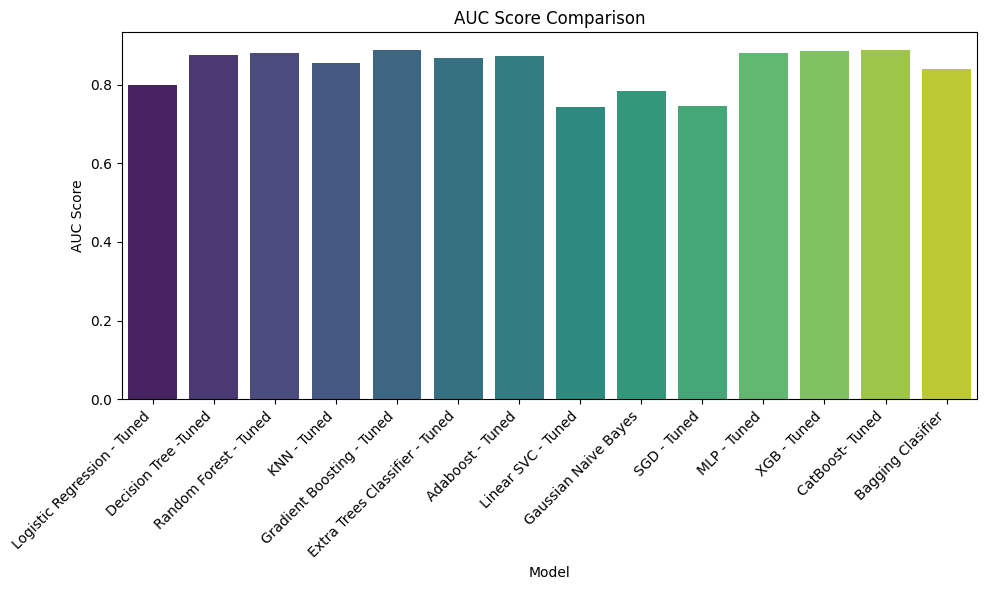

In [ ]:
plot_auc_comparison(model_eval_results)


In [ ]:
def plot_other_metrics_comparison(metrics_list):
    df = pd.DataFrame(metrics_list)

    # Melt for grouped bar plot
    df_melted = df.melt(id_vars="Model",
                        value_vars=["Accuracy", "Precision", "Recall"],
                        var_name="Metric",
                        value_name="Score")

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")
    plt.title("Accuracy, Precision, and Recall Comparison")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Metric")
    plt.tight_layout()
    plt.show()


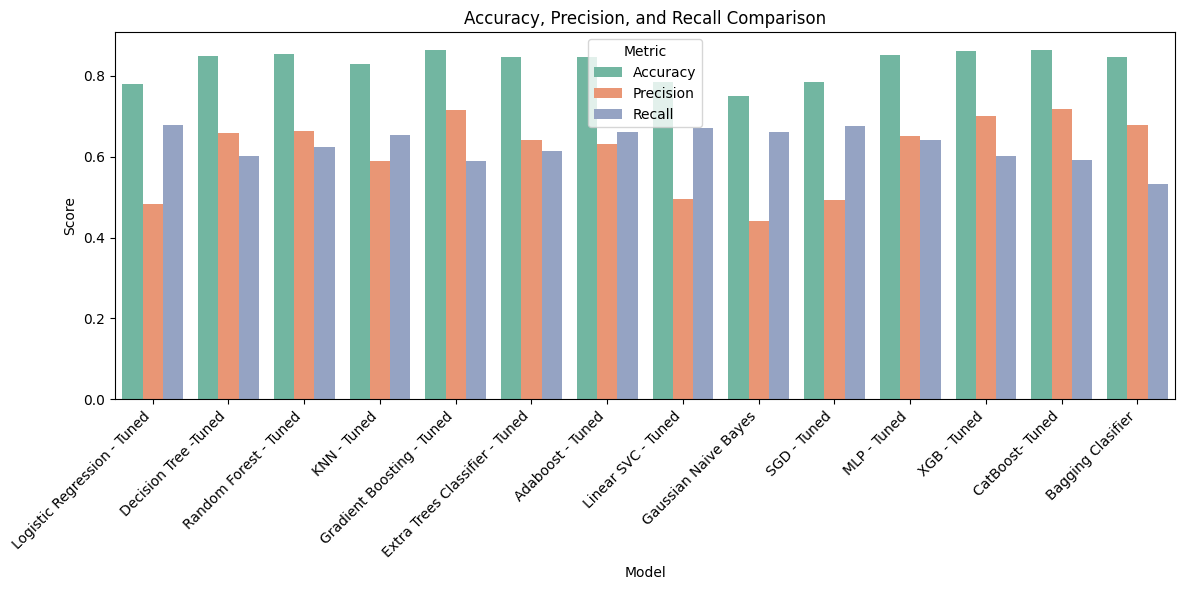

In [ ]:
plot_other_metrics_comparison(model_eval_results)


In [ ]:
def plot_auc_line_chart(metrics_list):
    df = pd.DataFrame(metrics_list)

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x="Model", y="AUC", marker='o', linewidth=2.5, color='teal')
    plt.title("Model AUC Comparison")
    plt.ylabel("AUC Score")
    plt.ylim(0.0, 1.05)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


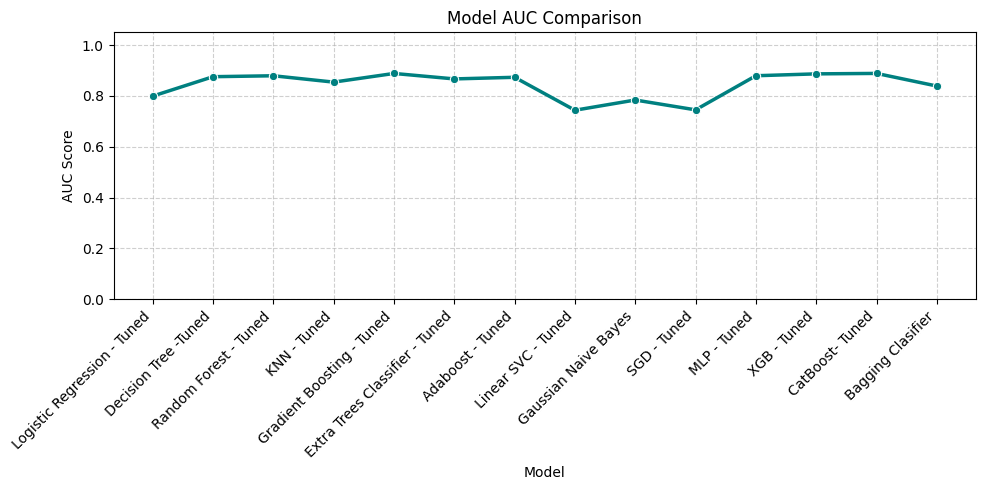

In [ ]:
plot_auc_line_chart(model_eval_results)


In [ ]:
model_eval_results

[{'Model': 'Logistic Regression - Tuned',
  'AUC': np.float64(0.7992725144146209),
  'Accuracy': 0.7788953858272488,
  'Precision': 0.48399592252803264,
  'Recall': 0.6798396334478809},
 {'Model': 'Decision Tree -Tuned',
  'AUC': np.float64(0.8755342083500985),
  'Accuracy': 0.8501529978489412,
  'Precision': 0.6600691171850456,
  'Recall': 0.6016609392898052},
 {'Model': 'Random Forest - Tuned',
  'AUC': np.float64(0.8791757299329754),
  'Accuracy': 0.8536674038840246,
  'Precision': 0.6640268047517515,
  'Recall': 0.6242840778923253},
 {'Model': 'KNN - Tuned',
  'AUC': np.float64(0.8542081341912755),
  'Accuracy': 0.8304602054109734,
  'Precision': 0.5895946294861865,
  'Recall': 0.6539232531500573},
 {'Model': 'Gradient Boosting - Tuned',
  'AUC': np.float64(0.8882790166809438),
  'Accuracy': 0.8632108340655013,
  'Precision': 0.7145836954632365,
  'Recall': 0.588631156930126},
 {'Model': 'Extra Trees Classifier - Tuned',
  'AUC': np.float64(0.8667886515624846),
  'Accuracy': 0.8456

## **7. Selecting Best Model**

In [ ]:
top5_auc_models = sorted(model_eval_results, key=lambda x: x['AUC'], reverse=True)[:5]

for i, model in enumerate(top5_auc_models, 1):
    print(f"{i}. {model['Model']} - AUC: {model['AUC']:.4f}")


1. CatBoost- Tuned - AUC: 0.8884
2. Gradient Boosting - Tuned - AUC: 0.8883
3. XGB - Tuned - AUC: 0.8867
4. MLP - Tuned - AUC: 0.8793
5. Random Forest - Tuned - AUC: 0.8792


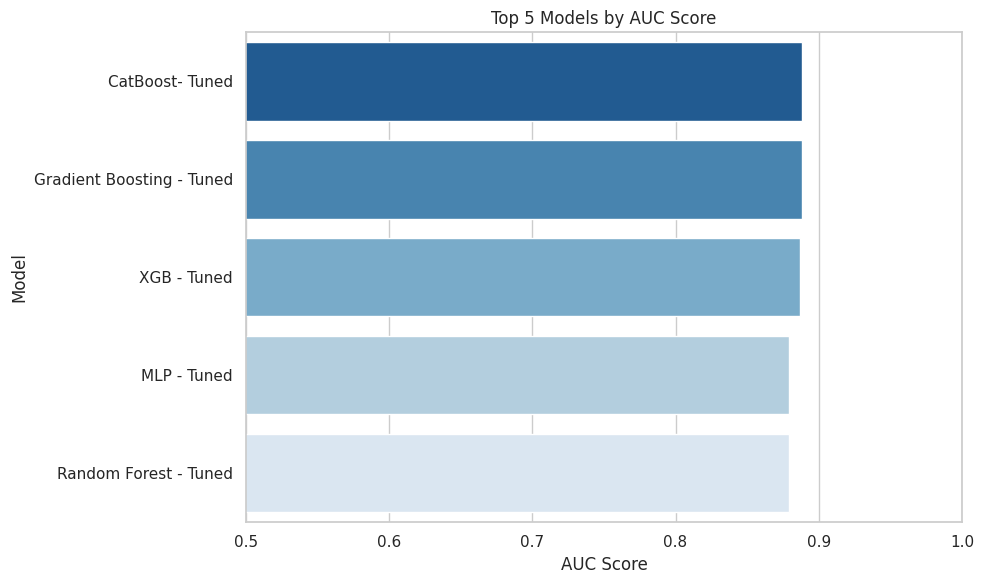

In [ ]:
model_names = [model['Model'] for model in top5_auc_models]
auc_scores = [model['AUC'] for model in top5_auc_models]

sns.set(style="whitegrid")
palette = sns.color_palette("Blues_r", len(model_names))

plt.figure(figsize=(10, 6))
sns.barplot(x=auc_scores, y=model_names, palette=palette)
plt.title('Top 5 Models by AUC Score')
plt.xlabel('AUC Score')
plt.ylabel('Model')
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()


In [ ]:
best_models = [grid_cat.best_estimator_, grid_gbc.best_estimator_, grid_xgb.best_estimator_, grid_mlp.best_estimator_, grid_rf.best_estimator_]
best_model_names = ['CatBoost', 'Gradient Boosting', 'XGBoost', 'MLP', 'Random Forest']

In [ ]:
def compare_models(models, model_names, X_test, y_test):
    plt.figure(figsize=(8, 15))

    # ROC Curve
    plt.subplot(3, 1, 1)
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    #Precision-Recall Curve
    plt.subplot(3, 1, 2)
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f'{name}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Bar Plot: Precision, Recall, F1
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for model in models:
        y_pred = model.predict(X_test)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    x = np.arange(len(model_names))
    width = 0.25

    plt.subplot(3, 1, 3)
    plt.bar(x - width, precision_scores, width, label='Precision')
    plt.bar(x, recall_scores, width, label='Recall')
    plt.bar(x + width, f1_scores, width, label='F1-Score')

    plt.xticks(x, model_names, rotation=45)
    plt.ylabel('Score')
    plt.title('Evaluation Metrics')
    plt.legend()

    plt.tight_layout()
    plt.show()

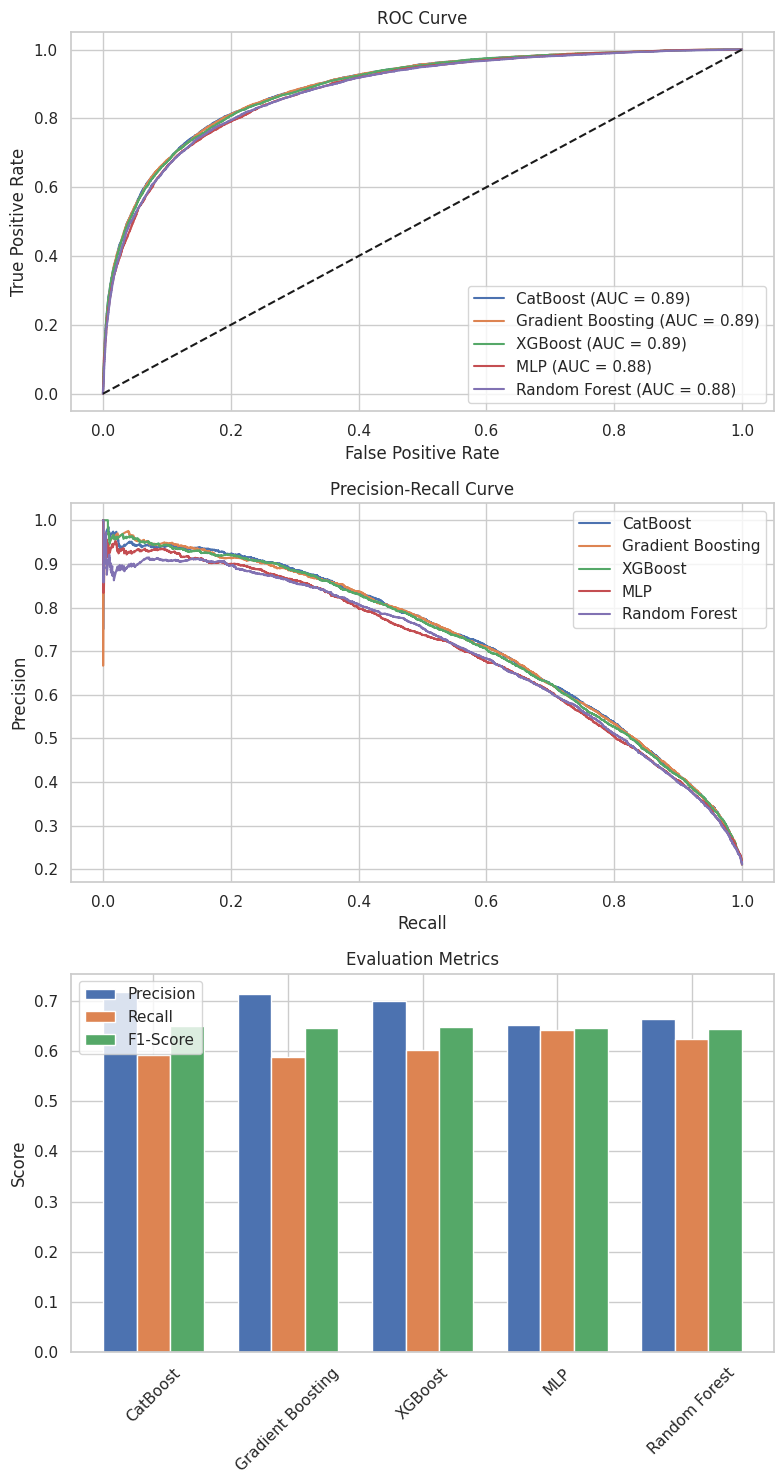

In [ ]:
compare_models(best_models, best_model_names, X_val_scaled, y_val)

In [ ]:
# Feature Importance for Gradient Boosting
feature_importances = grid_gbc.best_estimator_.feature_importances_

In [ ]:
# Create a DataFrame with feature names and their coefficients
feature_imp_df = pd.DataFrame({
    'Feature': X_val_scaled.columns,
    'Score': feature_importances
})
# Display all features with coefficients
print(feature_imp_df.sort_values(by='Score', ascending=False))

              Feature     Score
4       NumOfProducts  0.330594
1                 Age  0.270139
6      IsActiveMember  0.249333
5           HasCrCard  0.058068
8   Geography_Germany  0.035009
3             Balance  0.034175
9     Geography_Spain  0.005951
7     EstimatedSalary  0.005863
0         CreditScore  0.004524
2              Tenure  0.004185
10        Gender_Male  0.002160


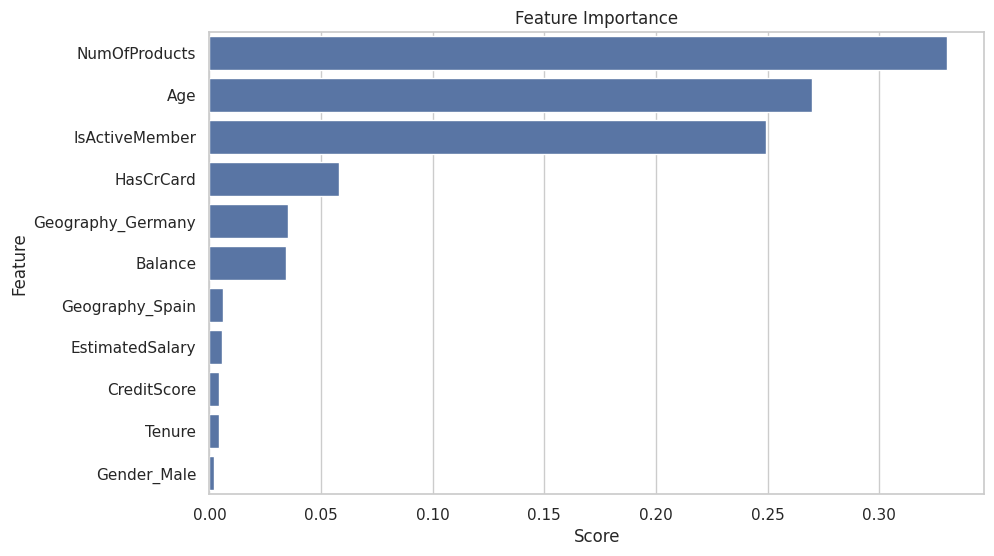

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_imp_df.sort_values(by='Score', ascending=False))
plt.title('Feature Importance')
plt.show()

**Thus we find that based on model prediction, "Gender", "Tenure", "Credit Score", "Estimated salary" and "Geography" other than Germany, contribute minimum to customer churning**